# Descrição Geral do Projeto

# Nome do Projeto: Análise Cinematográfica e Previsão de Sucesso para PProductions

## Descrição do Projeto
Este projeto realiza uma análise de dados sobre filmes para auxiliar o estúdio de Hollywood PProductions a decidir qual tipo de filme desenvolver em seguida. O projeto inclui Análise Exploratória de Dados (EDA), identificação de fatores relacionados ao alto faturamento, análise da coluna de sinopses (Overview) e a construção de um modelo preditivo para estimar a nota do IMDB de um filme.

## Objetivos
- Realizar EDA detalhada para entender as características do dataset.
- Identificar os principais fatores associados a filmes de alto faturamento.
- Desenvolver um modelo preditivo para estimar a nota do IMDB.
- Fornecer recomendações embasadas em dados para a PProductions.

## Como Configurar e Executar o Projeto

### Pré-requisitos
- Python 3.6+
- Google Colab ou ambiente Python com as bibliotecas listadas no `requirements.txt`.

### Instalação
1. Clone este repositório.
2. Navegue até a pasta do projeto no terminal.
3. Instale as bibliotecas necessárias usando o arquivo `requirements.txt`:

## Introdução

Este projeto foi desenvolvido como parte de um desafio para a Indicium, a pedido do estúdio de Hollywood PProductions. O objetivo principal é analisar um banco de dados de filmes para fornecer insights estratégicos e orientar a PProductions na decisão sobre qual tipo de filme desenvolver a seguir.

O projeto abrange as seguintes etapas:

*   **Análise Exploratória de Dados (EDA):** Para entender as características do dataset, identificar padrões e gerar hipóteses.
*   **Modelagem Preditiva:** Desenvolver um modelo para prever a nota do IMDB.
*   **Aplicação Web:** Criar uma interface simples para demonstrar a previsão do modelo.

Este notebook serve como o relatório completo do projeto, detalhando todas as análises, o desenvolvimento do modelo e a aplicação.

## Carga e Limpeza Inicial dos Dados

Nesta seção, iniciamos o projeto carregando o dataset fornecido a partir do arquivo CSV. Realizamos uma inspeção inicial dos dados para entender sua estrutura, o tipo de informação em cada coluna e identificar a presença de valores ausentes ou inconsistências que precisam ser tratadas.

As etapas de limpeza inicial incluem a conversão de colunas para o tipo de dado correto (por exemplo, a coluna 'Gross' para numérico) e o tratamento básico de valores ausentes em colunas relevantes para as análises subsequentes. O objetivo é preparar os dados em um formato adequado para a Análise Exploratória de Dados (EDA).

In [180]:
# CARREGAMENTO DO DATASET E INSPEÇÃO INICIAL
import pandas as pd

# Carregar o dataset
try:
    df = pd.read_csv('/content/desafio_indicium_imdb.csv')
    print("Dataset carregado com sucesso.")
except FileNotFoundError:
    print("Erro: Arquivo 'desafio_indicium_imdb.csv' não encontrado. Por favor, verifique o caminho.")
    df = None # Definir df como None em caso de erro

# Mostrar as primeiras linhas do DataFrame para verificar o carregamento
if df is not None:
    display("Primeiras 5 linhas do dataset:")
    display(df.head())
    # Mostrar informações básicas sobre o dataset
    display("\nInformações básicas do dataset:")
    display(df.info())
    # Mostrar estatísticas descritivas das colunas numéricas
    display("\nEstatísticas descritivas do dataset:")
    display(df.describe())
else:
    print("Não foi possível carregar o dataset. As próximas etapas podem falhar.")

Dataset carregado com sucesso.


'Primeiras 5 linhas do dataset:'

Unnamed: 0                                   Series_Title Released_Year  \
0           1                                  The Godfather          1972   
1           2                                The Dark Knight          2008   
2           3                         The Godfather: Part II          1974   
3           4                                   12 Angry Men          1957   
4           5  The Lord of the Rings: The Return of the King          2003   

  Certificate  Runtime                     Genre  IMDB_Rating  \
0           A  175 min              Crime, Drama          9.2   
1          UA  152 min      Action, Crime, Drama          9.0   
2           A  202 min              Crime, Drama          9.0   
3           U   96 min              Crime, Drama          9.0   
4           U  201 min  Action, Adventure, Drama          8.9   

                                            Overview  Meta_score  \
0  An organized crime dynasty's aging patriarch t...       100.0   
1  When the menace known as the Joker wreaks havo...        84.0   
2  The early life and career of Vito Corleone in ...        90.0   
3  A jury holdout attempts to prevent a miscarria...        96.0   
4  Gandalf and Aragorn lead the World of Men agai...        94.0   

               Director           Star1            Star2          Star3  \
0  Francis Ford Coppola   Marlon Brando        Al Pacino     James Caan   
1     Christopher Nolan  Christian Bale     Heath Ledger  Aaron Eckhart   
2  Francis Ford Coppola       Al Pacino   Robert De Niro  Robert Duvall   
3          Sidney Lumet     Henry Fonda      Lee J. Cobb  Martin Balsam   
4         Peter Jackson     Elijah Wood  Viggo Mortensen   Ian McKellen   

           Star4  No_of_Votes        Gross  
0   Diane Keaton      1620367  134,966,411  
1  Michael Caine      2303232  534,858,444  
2   Diane Keaton      1129952   57,300,000  
3   John Fiedler       689845    4,360,000  
4  Orlando Bloom      1642758  377,845,905

'\nInformações básicas do dataset:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


None

'\nEstatísticas descritivas do dataset:'

Unnamed: 0  IMDB_Rating  Meta_score   No_of_Votes
count  999.000000   999.000000  842.000000  9.990000e+02
mean   500.000000     7.947948   77.969121  2.716214e+05
std    288.530761     0.272290   12.383257  3.209126e+05
min      1.000000     7.600000   28.000000  2.508800e+04
25%    250.500000     7.700000   70.000000  5.547150e+04
50%    500.000000     7.900000   79.000000  1.383560e+05
75%    749.500000     8.100000   87.000000  3.731675e+05
max    999.000000     9.200000  100.000000  2.303232e+06

In [181]:
# ANÁLISE DA COLUNA 'OVERVIEW' (SINOPSE)
# Análise básica da coluna 'Overview' (sinopse)
# Verificar se o DataFrame existe e contém a coluna 'Overview'
if df is not None and 'Overview' in df.columns:
    display("\nAnálise da coluna 'Overview' (Sinopse):")

    # Mostrar as primeiras sinopses para ter uma ideia do conteúdo
    display("Primeiras 5 sinopses (Overview):")
    display(df['Overview'].head())

    # Calcular o comprimento médio das sinopses
    # Converter para string para garantir que .str.len() funcione e tratar NaNs
    average_overview_length = df['Overview'].astype(str).str.len().mean()

    # Exibir o comprimento médio formatado
    display(f"\nComprimento médio das sinopses: {average_overview_length:.2f} caracteres")
else:
    # Mensagem de erro caso o DataFrame ou a coluna necessária não estejam disponíveis
    print("DataFrame ou coluna 'Overview' não encontrados para análise.")

"\nAnálise da coluna 'Overview' (Sinopse):"

'Primeiras 5 sinopses (Overview):'

0    An organized crime dynasty's aging patriarch t...
1    When the menace known as the Joker wreaks havo...
2    The early life and career of Vito Corleone in ...
3    A jury holdout attempts to prevent a miscarria...
4    Gandalf and Aragorn lead the World of Men agai...
Name: Overview, dtype: object

'\nComprimento médio das sinopses: 146.28 caracteres'

In [182]:
# LIMPEZA E CONVERSÃO DA COLUNA 'GROSS'

# Limpeza e conversão da coluna 'Gross' para numérico
if df is not None:
    try:
        # Remover vírgulas e converter para float
        df['Gross'] = df['Gross'].astype(str).str.replace(',', '', regex=False)
        # Usar errors='coerce' para converter valores inválidos para NaN
        df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')

        print("\nColuna 'Gross' limpa e convertida para numérico.")

        # Verificar valores ausentes após a conversão
        display("\nValores ausentes na coluna 'Gross' após limpeza:")
        display(df['Gross'].isnull().sum())

        # Mostrar as primeiras linhas com a coluna 'Gross' convertida
        display("\nPrimeiras 5 linhas com a coluna 'Gross' convertida:")
        display(df[['Series_Title', 'Gross']].head())

    except Exception as e:
        print(f"Erro ao limpar e converter a coluna 'Gross': {e}")
else:
    print("DataFrame não carregado. Não é possível limpar a coluna 'Gross'.")


Coluna 'Gross' limpa e convertida para numérico.


"\nValores ausentes na coluna 'Gross' após limpeza:"

np.int64(169)

"\nPrimeiras 5 linhas com a coluna 'Gross' convertida:"

Series_Title        Gross
0                                  The Godfather  134966411.0
1                                The Dark Knight  534858444.0
2                         The Godfather: Part II   57300000.0
3                                   12 Angry Men    4360000.0
4  The Lord of the Rings: The Return of the King  377845905.0

In [183]:
# VERIFICAR VALORES AUSENTES GERAIS
# Verificar valores ausentes em todas as colunas
if df is not None:
    display("\nValores ausentes por coluna:")
    display(df.isnull().sum())
else:
    print("DataFrame não carregado. Não é possível verificar valores ausentes.")

'\nValores ausentes por coluna:'

Unnamed: 0         0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

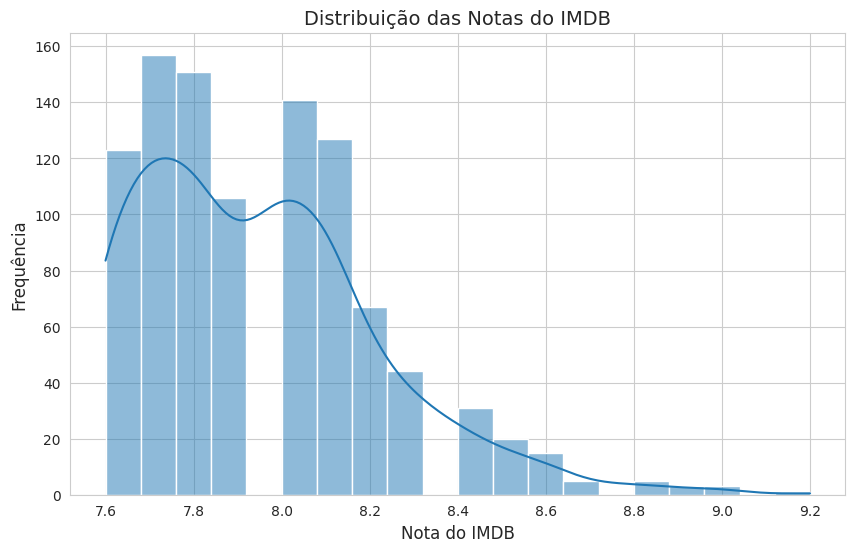

In [184]:
# VISUALIZAÇÃO: DISTRIBUIÇÃO DAS NOTAS DO IMDB
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar o estilo dos gráficos
sns.set_style('whitegrid')

# Criar um histograma para a coluna IMDB_Rating
if df is not None and 'IMDB_Rating' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df['IMDB_Rating'], kde=True, bins=20)
    plt.title('Distribuição das Notas do IMDB', fontsize=14) # Título mais claro
    plt.xlabel('Nota do IMDB', fontsize=12) # Rótulo do eixo X
    plt.ylabel('Frequência', fontsize=12) # Rótulo do eixo Y
    plt.show()
else:
    print("DataFrame ou coluna 'IMDB_Rating' não encontrados para gerar o histograma.")

'\nTop 10 Gêneros mais comuns:'

Genre  Count
1       Drama    723
10     Comedy    233
0       Crime    209
3   Adventure    196
2      Action    189
11   Thriller    137
7     Romance    125
4   Biography    109
15    Mystery     99
12  Animation     82

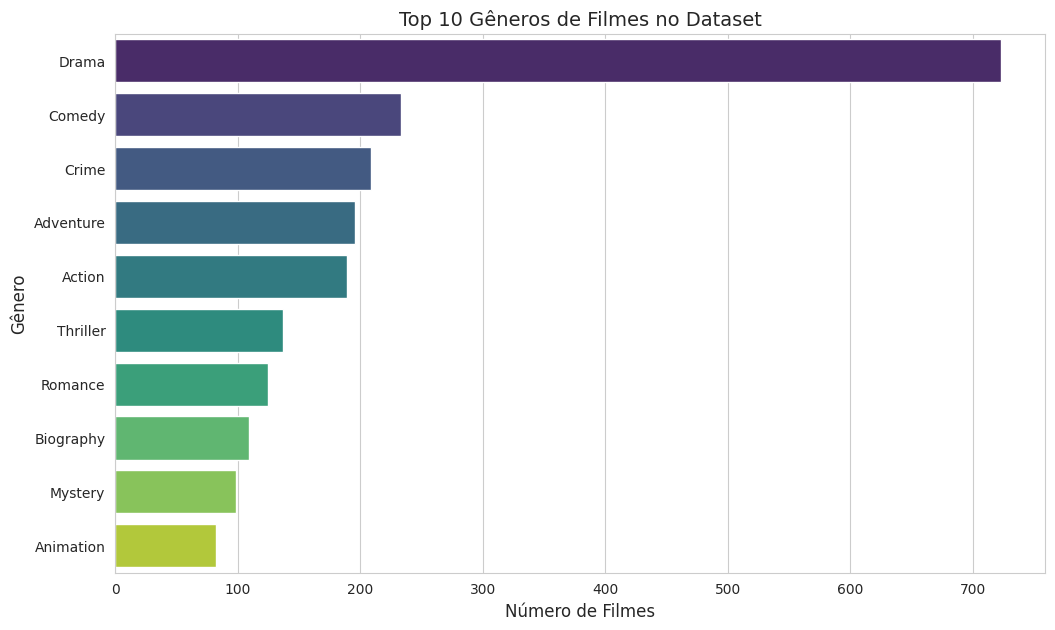

In [185]:
# VISUALIZAÇÃO: TOP 10 GÊNEROS MAIS COMUNS
# A coluna 'Genre' pode conter múltiplos gêneros separados por vírgula.
# Vamos extrair todos os gêneros únicos e contar suas ocorrências.
from collections import Counter

if df is not None and 'Genre' in df.columns:
    # Garantir que a coluna Genre é string antes de split
    genres = df['Genre'].astype(str).str.replace(' ', '').str.split(',').sum()
    genre_counts = Counter(genres)

    # Converter para DataFrame para facilitar a visualização com seaborn
    # Filtrar gêneros vazios que possam ter sido criados
    genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count'])
    genre_df = genre_df[genre_df['Genre'] != ''].sort_values(by='Count', ascending=False)


    # Mostrar os gêneros mais comuns
    display("\nTop 10 Gêneros mais comuns:")
    display(genre_df.head(10))

    # Criar um gráfico de barras para os gêneros mais comuns
    plt.figure(figsize=(12, 7))
    # Usar 'Genre' para hue para evitar o FutureWarning e manter o mapeamento de cores
    sns.barplot(x='Count', y='Genre', data=genre_df.head(10), palette='viridis', hue='Genre', legend=False)
    plt.title('Top 10 Gêneros de Filmes no Dataset', fontsize=14) # Título mais claro
    plt.xlabel('Número de Filmes', fontsize=12) # Rótulo do eixo X
    plt.ylabel('Gênero', fontsize=12) # Rótulo do eixo Y
    plt.show()
else:
    print("DataFrame ou coluna 'Genre' não encontrados para analisar e visualizar os gêneros.")

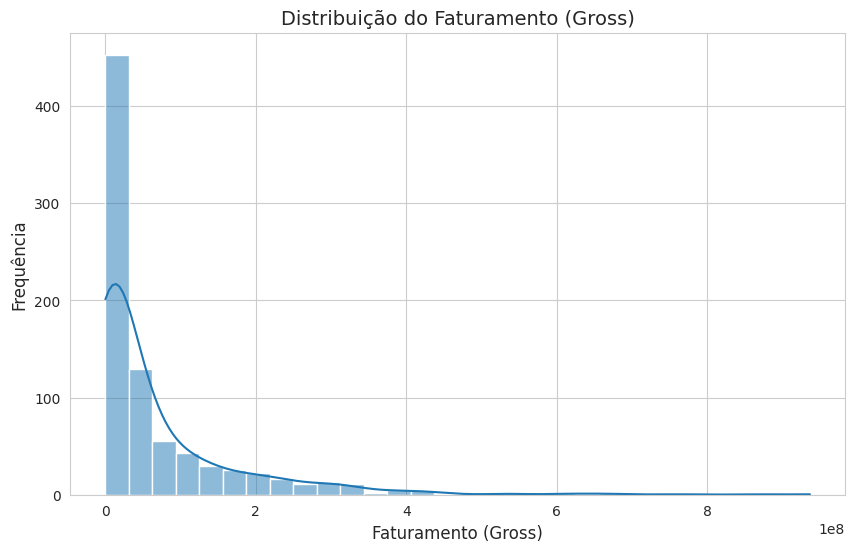

In [186]:
# VISUALIZAÇÃO: DISTRIBUIÇÃO DO FATURAMENTO (GROSS)
# Visualizar a distribuição da coluna 'Gross'
if df is not None and 'Gross' in df.columns:
    plt.figure(figsize=(10, 6))
    # Usamos dropna() para ignorar os valores ausentes na visualização
    sns.histplot(df['Gross'].dropna(), kde=True, bins=30)
    plt.title('Distribuição do Faturamento (Gross)', fontsize=14) # Título mais claro
    plt.xlabel('Faturamento (Gross)', fontsize=12) # Rótulo do eixo X
    plt.ylabel('Frequência', fontsize=12) # Rótulo do eixo Y
    # Formatar o eixo X para melhor legibilidade de valores monetários (opcional, depende da escala)
    # plt.ticklabel_format(style='plain', axis='x') # Desabilita notação científica
    plt.show()
else:
     print("DataFrame ou coluna 'Gross' não encontrados para gerar o histograma de faturamento.")

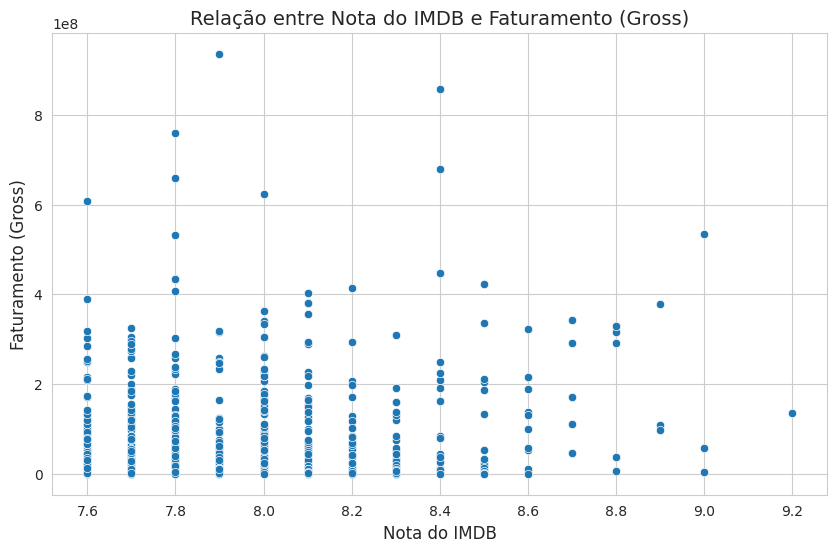

In [187]:
# VISUALIZAÇÃO: RELAÇÃO ENTRE IMDB_RATING E GROSS
# Visualizar a relação entre IMDB_Rating e Gross
if df is not None and 'IMDB_Rating' in df.columns and 'Gross' in df.columns:
    plt.figure(figsize=(10, 6))
    # Usamos dropna para remover filmes sem valor em Gross ou IMDB_Rating para o scatter plot
    sns.scatterplot(x='IMDB_Rating', y='Gross', data=df.dropna(subset=['Gross', 'IMDB_Rating']))
    plt.title('Relação entre Nota do IMDB e Faturamento (Gross)', fontsize=14) # Título mais claro
    plt.xlabel('Nota do IMDB', fontsize=12) # Rótulo do eixo X
    plt.ylabel('Faturamento (Gross)', fontsize=12) # Rótulo do eixo Y
    # Formatar o eixo Y para melhor legibilidade de valores monetários (opcional)
    # plt.ticklabel_format(style='plain', axis='y')
    plt.show()
else:
    print("DataFrame ou colunas 'IMDB_Rating'/'Gross' não encontrados para gerar o scatter plot.")

In [188]:
# ANÁLISE DE FATURAMENTO POR DIRETOR E ESTRELAS
# Análise do faturamento por diretor e estrelas
if df is not None:
    display("\nAnálise de Faturamento por Diretor e Estrelas:")

    # Garantir que a coluna 'Gross' seja numérica, tratando erros
    if 'Gross' in df.columns:
        # Já convertemos 'Gross' para numérico na etapa de limpeza inicial,
        # mas garantimos aqui novamente por segurança antes da agregação.
        df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')
    else:
        print("Aviso: Coluna 'Gross' não encontrada no DataFrame para análise de faturamento por diretor/estrelas.")
        # Se Gross não existe, não podemos continuar esta análise
        director_gross = pd.Series(dtype=float) # Criar séries vazias para evitar erros
        star1_gross = pd.Series(dtype=float)
        print("Análise de faturamento por diretor e estrelas pulada devido à falta da coluna 'Gross'.")


    if 'Director' in df.columns and 'Gross' in df.columns:
        # Calcular o faturamento médio por diretor (ignorando NaNs na coluna 'Gross')
        director_gross = df.groupby('Director')['Gross'].mean().sort_values(ascending=False)
        display("\nTop 10 Diretores por Faturamento Médio:")
        display(director_gross.head(10))
    else:
        print("Aviso: Coluna 'Director' ou 'Gross' não encontrada para análise de faturamento por diretor.")
        director_gross = pd.Series(dtype=float) # Criar série vazia

    star_cols_analysis = ['Star1', 'Star2', 'Star3', 'Star4']
    for star_col in star_cols_analysis:
        if star_col in df.columns and 'Gross' in df.columns:
            # Calcular o faturamento médio por estrela (ignorando NaNs na coluna 'Gross')
            star_gross = df.groupby(star_col)['Gross'].mean().sort_values(ascending=False)
            display(f"\nTop 10 Estrelas ({star_col}) por Faturamento Médio:")
            display(star_gross.head(10))
        else:
            print(f"Aviso: Coluna '{star_col}' ou 'Gross' não encontrada para análise de faturamento por {star_col}.")


else:
    print("DataFrame não carregado. Não é possível realizar análise de faturamento por diretor e estrelas.")

'\nAnálise de Faturamento por Diretor e Estrelas:'

'\nTop 10 Diretores por Faturamento Médio:'

Director
Anthony Russo     5.512599e+08
Gareth Edwards    5.321773e+08
J.J. Abrams       4.743903e+08
Josh Cooley       4.340380e+08
Roger Allers      4.227838e+08
Tim Miller        3.630707e+08
James Gunn        3.614949e+08
James Cameron     3.496473e+08
Byron Howard      3.412682e+08
David Yates       3.263179e+08
Name: Gross, dtype: float64

'\nTop 10 Estrelas (Star1) por Faturamento Médio:'

Star1
Daisy Ridley         9.366622e+08
Sam Worthington      7.605076e+08
Joe Russo            5.512599e+08
Felicity Jones       5.321773e+08
Henry Thomas         4.351106e+08
Craig T. Nelson      4.350114e+08
Rob Minkoff          4.227838e+08
Robert Downey Jr.    3.835734e+08
Lee Unkrich          3.808433e+08
Chris Pratt          3.614949e+08
Name: Gross, dtype: float64

'\nTop 10 Estrelas (Star2) por Faturamento Médio:'

Star2
John Boyega          9.366622e+08
Holly Hunter         6.085817e+08
Zoe Saldana          5.751604e+08
Diego Luna           5.321773e+08
Robert Downey Jr.    5.234229e+08
Drew Barrymore       4.351106e+08
Matthew Broderick    4.227838e+08
Laura Dern           4.024539e+08
Albert Brooks        3.808433e+08
Chris Evans          3.641226e+08
Name: Gross, dtype: float64

'\nTop 10 Estrelas (Star3) por Faturamento Médio:'

Star3
Chris Evans         858373000.0
Chris Hemsworth     678815482.0
Billy Zane          659325379.0
Sarah Vowell        608581744.0
Aaron Eckhart       534858444.0
Alan Tudyk          532177324.0
Sigourney Weaver    499569874.5
Oscar Isaac         481052591.5
Anne Hathaway       448139099.0
Peter Coyote        435110554.0
Name: Gross, dtype: float64

'\nTop 10 Estrelas (Star4) por Faturamento Médio:'

Star4
Michelle Rodriguez    7.605076e+08
Kathy Bates           6.593254e+08
Jeremy Renner         6.232795e+08
Mark Ruffalo          6.174156e+08
Huck Milner           6.085817e+08
Domhnall Gleeson      5.601501e+08
Donnie Yen            5.321773e+08
Gary Oldman           4.481391e+08
Dee Wallace           4.351106e+08
Tony Hale             4.340380e+08
Name: Gross, dtype: float64

'\nAnálise de Faturamento por Gênero:'

'\nTop 10 Gêneros por Faturamento Médio:'

Genre
Adventure    1.657313e+08
Sci-Fi       1.480264e+08
Action       1.412393e+08
Animation    1.279675e+08
Fantasy      1.086168e+08
Family       9.293266e+07
Comedy       6.412530e+07
Thriller     5.867663e+07
History      5.553953e+07
Biography    5.525602e+07
Name: Gross, dtype: float64

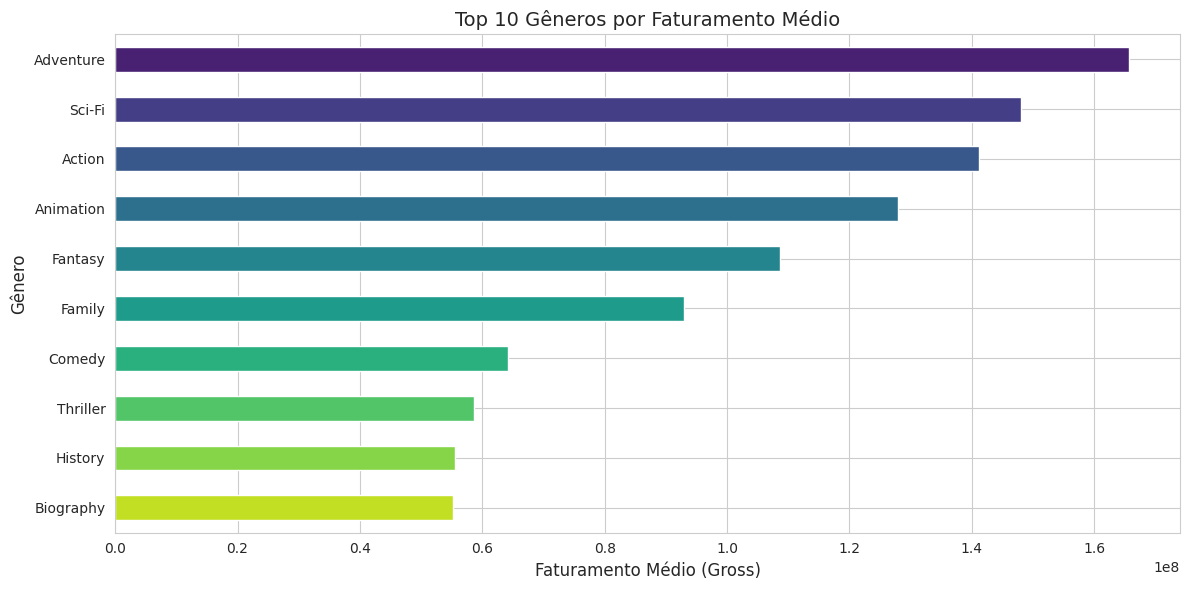

In [189]:
# ANÁLISE DE FATURAMENTO POR GÊNERO
# Análise do faturamento por gênero
if df is not None and 'Genre' in df.columns and 'Gross' in df.columns:
    display("\nAnálise de Faturamento por Gênero:")

    # Precisamos expandir os gêneros para analisar o faturamento por gênero individual
    # Create a DataFrame where each row is a movie-genre pair
    # Crie um DataFrame onde cada linha é um par filme-gênero
    genre_gross_df = df[['Series_Title', 'Genre', 'Gross']].copy()
    # Garantir que a coluna 'Genre' seja string para split
    genre_gross_df['Genre'] = genre_gross_df['Genre'].astype(str)
    # Expandir a coluna 'Genre'
    genre_gross_df['Genre'] = genre_gross_df['Genre'].str.replace(' ', '').str.split(',')
    genre_gross_df = genre_gross_df.explode('Genre')

    # Remover linhas onde o gênero é vazio ou NaN após a expansão
    genre_gross_df = genre_gross_df[genre_gross_df['Genre'] != '']
    genre_gross_df = genre_gross_df.dropna(subset=['Genre'])


    # Garantir que a coluna 'Gross' seja numérica antes de calcular a média
    if 'Gross' in genre_gross_df.columns:
         # Já convertemos 'Gross' para numérico na etapa de limpeza inicial,
         # mas garantimos aqui novamente por segurança antes da agregação.
         genre_gross_df['Gross'] = pd.to_numeric(genre_gross_df['Gross'], errors='coerce')
         # Remover linhas onde o faturamento é NaN após a conversão (se quisermos analisar faturamento médio de filmes COM faturamento registrado)
         # Para análise de ALTO faturamento, faz sentido remover NaNs.
         genre_gross_df = genre_gross_df.dropna(subset=['Gross'])
    else:
        print("Aviso: Coluna 'Gross' não encontrada no DataFrame de gênero para análise de faturamento por gênero.")
        average_gross_by_genre = pd.Series(dtype=float) # Criar série vazia


    if 'Genre' in genre_gross_df.columns and 'Gross' in genre_gross_df.columns:
        # Calcular o faturamento médio por gênero (ignorando NaNs na coluna 'Gross' após a limpeza)
        average_gross_by_genre = genre_gross_df.groupby('Genre')['Gross'].mean().sort_values(ascending=False)
        display("\nTop 10 Gêneros por Faturamento Médio:")
        display(average_gross_by_genre.head(10))
    else:
        print("Aviso: Coluna 'Genre' ou 'Gross' não encontrada no DataFrame de gênero após pré-processamento.")
        average_gross_by_genre = pd.Series(dtype=float) # Criar série vazia


    # Opcional: Visualizar o faturamento médio por gênero
    # Se average_gross_by_genre não estiver vazia, gerar o gráfico
    if not average_gross_by_genre.empty:
        plt.figure(figsize=(12, 6))
        # Usar plot(kind='barh') para barras horizontais, que funcionam bem com muitos rótulos no eixo Y
        average_gross_by_genre.head(10).plot(kind='barh', color=sns.color_palette('viridis', 10)) # Usar palette para cores
        plt.title('Top 10 Gêneros por Faturamento Médio', fontsize=14) # Título mais claro
        plt.xlabel('Faturamento Médio (Gross)', fontsize=12) # Rótulo do eixo X
        plt.ylabel('Gênero', fontsize=12) # Rótulo do eixo Y
        # plt.xticks(rotation=45, ha='right') # Rotacionar rótulos do eixo X se necessário (para bar vertical)
        plt.gca().invert_yaxis() # Inverter o eixo Y para ter o maior valor no topo (para barh)
        plt.tight_layout() # Ajustar layout para evitar sobreposição
        # Formatar o eixo X para melhor legibilidade de valores monetários (opcional)
        # plt.ticklabel_format(style='plain', axis='x')
        plt.show()
    else:
        print("Dados de faturamento médio por gênero não disponíveis para visualização.")


else:
    print("DataFrame, coluna 'Genre' ou 'Gross' não encontrados. Não é possível realizar análise e visualização de faturamento por gênero.")

'\nVisualização: Top 10 Gêneros por Faturamento Médio:'

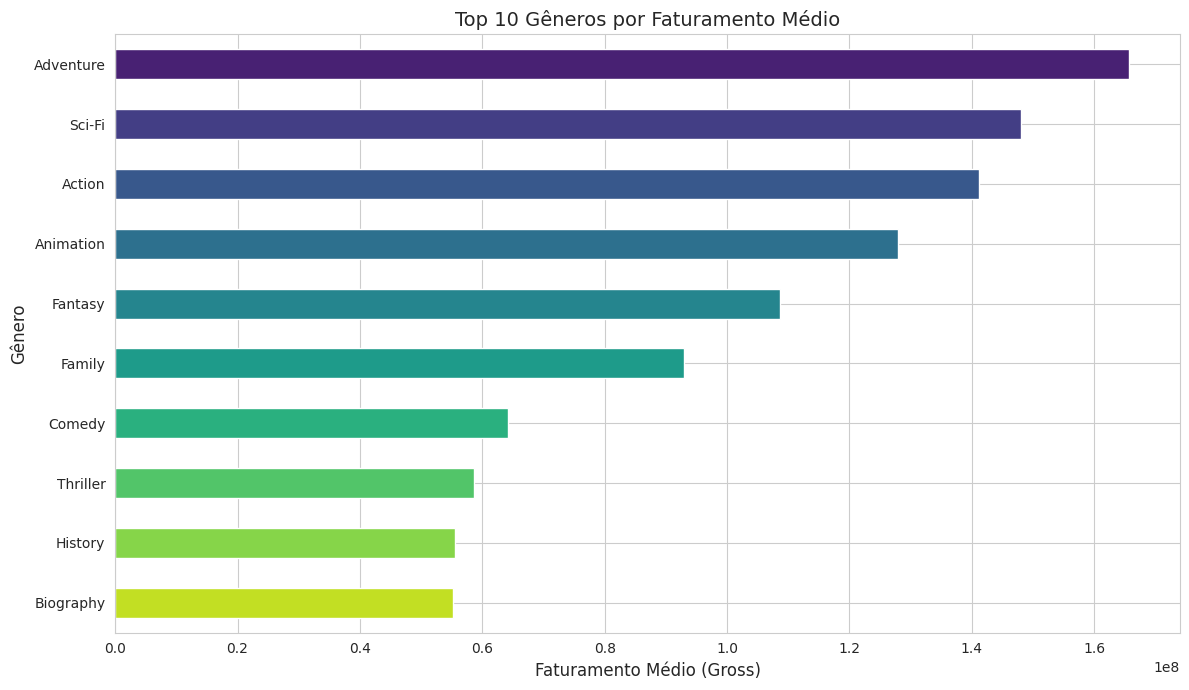

In [190]:
# VISUALIZAÇÃO: TOP 10 GÊNEROS POR FATURAMENTO MÉDIO
# Para calcular o faturamento médio por gênero, precisamos expandir os gêneros.
# Cada filme contribuirá com seu faturamento para cada um de seus gêneros.
if df is not None and 'Genre' in df.columns and 'Gross' in df.columns:
    display("\nVisualização: Top 10 Gêneros por Faturamento Médio:")

    # Precisamos expandir os gêneros para analisar o faturamento por gênero individual
    # Crie um DataFrame onde cada linha é um par filme-gênero
    # Ignoramos filmes sem faturamento conhecido usando dropna(subset=['Gross'])
    genre_gross_df = df.dropna(subset=['Gross'])[['Series_Title', 'Genre', 'Gross']].copy()

    # Garantir que a coluna 'Genre' seja string para split
    genre_gross_df['Genre'] = genre_gross_df['Genre'].astype(str)
    # Expandir a coluna 'Genre'
    genre_gross_df['Genre'] = genre_gross_df['Genre'].str.replace(' ', '').str.split(',')
    genre_gross_df = genre_gross_df.explode('Genre')

    # Remover linhas onde o gênero é vazio ou NaN após a expansão
    genre_gross_df = genre_gross_df[genre_gross_df['Genre'] != '']
    genre_gross_df = genre_gross_df.dropna(subset=['Genre'])

    # Garantir que a coluna 'Gross' seja numérica
    if 'Gross' in genre_gross_df.columns:
         genre_gross_df['Gross'] = pd.to_numeric(genre_gross_df['Gross'], errors='coerce')
         # Remover NaNs de Gross novamente após explode, se algum foi introduzido (embora improvável após dropna inicial)
         genre_gross_df = genre_gross_df.dropna(subset=['Gross'])
    else:
        print("Aviso: Coluna 'Gross' não encontrada no DataFrame de gênero após explode.")
        average_gross_by_genre = pd.Series(dtype=float) # Criar série vazia


    if 'Genre' in genre_gross_df.columns and 'Gross' in genre_gross_df.columns:
        # Calcular o faturamento médio por gênero (ignorando NaNs na coluna 'Gross')
        average_gross_by_genre = genre_gross_df.groupby('Genre')['Gross'].mean().sort_values(ascending=False)
    else:
        print("Aviso: Coluna 'Genre' ou 'Gross' não encontrada no DataFrame de gênero para cálculo da média.")
        average_gross_by_genre = pd.Series(dtype=float) # Criar série vazia


    # Visualizar o faturamento médio por gênero com um gráfico de barras
    # Se average_gross_by_genre não estiver vazia, gerar o gráfico
    if not average_gross_by_genre.empty:
        plt.figure(figsize=(12, 7))
        # Usar plot(kind='barh') para barras horizontais, que funcionam bem com muitos rótulos no eixo Y
        average_gross_by_genre.head(10).plot(kind='barh', color=sns.color_palette('viridis', 10)) # Usar palette para cores
        plt.title('Top 10 Gêneros por Faturamento Médio', fontsize=14) # Título mais claro
        plt.xlabel('Faturamento Médio (Gross)', fontsize=12) # Rótulo do eixo X
        plt.ylabel('Gênero', fontsize=12) # Rótulo do eixo Y
        # plt.xticks(rotation=45, ha='right') # Rotacionar rótulos do eixo X se necessário (para bar vertical)
        plt.gca().invert_yaxis() # Inverter o eixo Y para ter o maior valor no topo (para barh)
        plt.tight_layout() # Ajustar layout para evitar sobreposição
        # Formatar o eixo X para melhor legibilidade de valores monetários (opcional)
        # plt.ticklabel_format(style='plain', axis='x')
        plt.show()
    else:
        print("Dados de faturamento médio por gênero não disponíveis para visualização.")

else:
    print("DataFrame, coluna 'Genre' ou 'Gross' não encontrados. Não é possível realizar análise e visualização de faturamento por gênero.")

'\nAnálise da Relação entre Faturamento, Notas e Votos (Correlação):'

'\nMatriz de Correlação:'

Gross  IMDB_Rating  Meta_score  No_of_Votes
Gross        1.000000     0.099393   -0.030480     0.589527
IMDB_Rating  0.099393     1.000000    0.271374     0.479308
Meta_score  -0.030480     0.271374    1.000000    -0.020091
No_of_Votes  0.589527     0.479308   -0.020091     1.000000

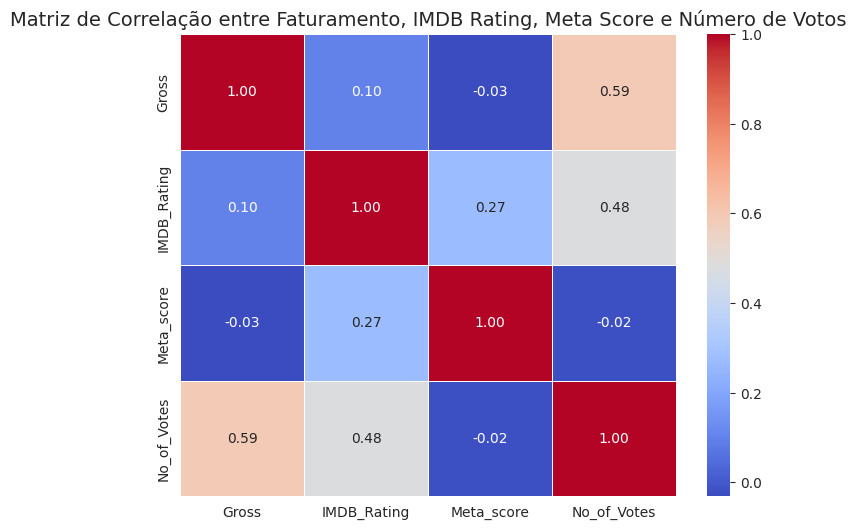

'\nInsights da Matriz de Correlação:'

"- Faturamento ('Gross') tem uma correlação positiva moderada com o Número de Votos ('No_of_Votes') (0.59), sugerindo que filmes com mais votos tendem a ter maior faturamento."

"- A Nota do IMDB ('IMDB_Rating') tem uma correlação positiva moderada com o Número de Votos ('No_of_Votes') (0.48) e uma correlação positiva mais fraca com o Meta Score ('Meta_score') (0.27)."

"- A correlação entre Faturamento ('Gross') e Nota do IMDB ('IMDB_Rating') é relativamente baixa (0.10), indicando que uma nota alta no IMDB nem sempre se traduz diretamente em um alto faturamento neste dataset."

'- Meta Score e Número de Votos têm uma correlação muito baixa (-0.02), sugerindo que a pontuação da crítica e a popularidade (medida pelos votos) não estão fortemente ligadas neste conjunto de dados.'

In [191]:
# ANÁLISE DE CORRELAÇÃO

# Análise da relação entre variáveis numéricas usando a matriz de correlação.
# Isso nos ajuda a entender como Faturamento, Nota do IMDB, Meta Score e Número de Votos se relacionam.
# Verificar se o DataFrame existe antes de prosseguir
if df is not None:
    display("\nAnálise da Relação entre Faturamento, Notas e Votos (Correlação):")

    # Selecionar as colunas relevantes para calcular a correlação
    correlation_cols = ['Gross', 'IMDB_Rating', 'Meta_score', 'No_of_Votes']

    # Garantir que as colunas selecionadas existam no DataFrame e sejam numéricas.
    # Usamos errors='coerce' para converter valores não numéricos para NaN, se houver.
    # Isso é importante para que a função .corr() funcione corretamente.
    for col in correlation_cols:
        if col in df.columns:
            # Usar .loc para evitar SettingWithCopyWarning e garantir a modificação no DataFrame original.
            df.loc[:, col] = pd.to_numeric(df[col], errors='coerce')
        else:
            print(f"Aviso: Coluna '{col}' não encontrada para análise de correlação.")


    # Selecionar apenas as colunas numéricas existentes para calcular a matriz de correlação.
    existing_correlation_cols = [col for col in correlation_cols if col in df.columns]

    # Calcular a matriz de correlação pairwise.
    # .corr() calcula a correlação de Pearson por padrão e ignora NaNs.
    if len(existing_correlation_cols) > 1: # É necessário pelo menos duas colunas para calcular correlação
        correlation_matrix = df[existing_correlation_cols].corr()

        display("\nMatriz de Correlação:")
        display(correlation_matrix)

        # Visualizar a matriz de correlação usando um mapa de calor (heatmap).
        # Um heatmap é útil para visualizar a força e direção das correlações entre múltiplos pares de variáveis.
        import seaborn as sns # Importar seaborn novamente por segurança, se necessário
        plt.figure(figsize=(8, 6)) # Definir o tamanho da figura
        # annot=True exibe os valores de correlação nas células do heatmap
        # cmap='coolwarm' define o esquema de cores (azul para correlação negativa, vermelho para positiva)
        # fmt=".2f" formata os valores com 2 casas decimais
        # linewidths=.5 adiciona linhas entre as células
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

        # Adicionar título ao gráfico
        plt.title('Matriz de Correlação entre Faturamento, IMDB Rating, Meta Score e Número de Votos', fontsize=14)

        # Mostrar o gráfico
        plt.show()

        # Insights da correlação (interpretação dos valores da matriz)
        display("\nInsights da Matriz de Correlação:")
        # Interpretar as correlações entre pares de variáveis relevantes.
        # Verificar se as colunas existem na matriz de correlação calculada antes de tentar acessá-las.
        if 'Gross' in correlation_matrix.columns and 'No_of_Votes' in correlation_matrix.columns:
             display(f"- Faturamento ('Gross') tem uma correlação positiva moderada com o Número de Votos ('No_of_Votes') ({correlation_matrix.loc['Gross', 'No_of_Votes']:.2f}), sugerindo que filmes com mais votos tendem a ter maior faturamento.")
        if 'IMDB_Rating' in correlation_matrix.columns and 'No_of_Votes' in correlation_matrix.columns and 'Meta_score' in correlation_matrix.columns:
             display(f"- A Nota do IMDB ('IMDB_Rating') tem uma correlação positiva moderada com o Número de Votos ('No_of_Votes') ({correlation_matrix.loc['IMDB_Rating', 'No_of_Votes']:.2f}) e uma correlação positiva mais fraca com o Meta Score ('Meta_score') ({correlation_matrix.loc['IMDB_Rating', 'Meta_score']:.2f}).")
        if 'Gross' in correlation_matrix.columns and 'IMDB_Rating' in correlation_matrix.columns:
             display(f"- A correlação entre Faturamento ('Gross') e Nota do IMDB ('IMDB_Rating') é relativamente baixa ({correlation_matrix.loc['Gross', 'IMDB_Rating']:.2f}), indicando que uma nota alta no IMDB nem sempre se traduz diretamente em um alto faturamento neste dataset.")
        if 'Meta_score' in correlation_matrix.columns and 'No_of_Votes' in correlation_matrix.columns:
             display(f"- Meta Score e Número de Votos têm uma correlação muito baixa ({correlation_matrix.loc['Meta_score', 'No_of_Votes']:.2f}), sugerindo que a pontuação da crítica e a popularidade (medida pelos votos) não estão fortemente ligadas neste conjunto de dados.")

    elif len(existing_correlation_cols) > 0:
        # Mensagem se houver colunas numéricas, mas não suficientes para formar pares
        print("Não há colunas numéricas suficientes (mais de uma) para calcular a matriz de correlação.")
    else:
        # Mensagem se nenhuma das colunas esperadas foi encontrada
        print("Nenhuma das colunas de correlação ('Gross', 'IMDB_Rating', 'Meta_score', 'No_of_Votes') foi encontrada no DataFrame.")


else:
    # Mensagem se o DataFrame não estiver disponível
    print("DataFrame não carregado. Não é possível realizar análise de correlação.")

In [192]:
# PRÉ-PROCESSAMENTO DE TEXTO NA COLUNA 'OVERVIEW'
import nltk
from nltk.corpus import stopwords
from collections import Counter
import re

# Baixar stopwords se ainda não tiverem sido baixadas

try:
    # Tenta encontrar as stopwords. Se não encontrar, LookupError é levantado.
    nltk.data.find('corpora/stopwords')
except LookupError:
    # Se LookupError, tenta baixar as stopwords
    print("Baixando stopwords do NLTK...")
    nltk.download('stopwords')
except Exception as e:
    # Captura outros possíveis erros durante a busca
    print(f"Erro ao buscar stopwords: {e}")

# Carregar as stopwords
try:
    stopwords_set = set(stopwords.words('english'))
    print("Stopwords carregadas com sucesso.")
except Exception as e:
    print(f"Erro ao carregar stopwords: {e}")
    stopwords_set = set() # Definir como conjunto vazio em caso de erro

# Função para limpar o texto e remover stopwords
def clean_text(text):
    if pd.isna(text): # Tratar valores NaN
        return ""
    text = str(text) # Garantir que é string
    text = re.sub(r'[^a-zA-Z\s]', '', text).lower() # Remover pontuação e converter para minúsculas # Remove punctuation and convert to lowercase
    words = text.split()
    # Usar o conjunto de stopwords carregado
    cleaned_words = [word for word in words if word not in stopwords_set]
    return ' '.join(cleaned_words)

# Aplicar a limpeza na coluna Overview
if df is not None and 'Overview' in df.columns:
    display("\nAplicando limpeza de texto na coluna 'Overview'...")
    # Usar .loc para evitar SettingWithCopyWarning
    df.loc[:, 'Cleaned_Overview'] = df['Overview'].apply(clean_text)

    # Mostrar as primeiras sinopses limpas
    display("Primeiras 5 sinopses limpas:")
    display(df['Cleaned_Overview'].head())

    # Analisar a frequência das palavras em todas as sinopses limpas combinadas
    # Filtrar sinopses limpas vazias antes de juntar
    all_words = ' '.join(df['Cleaned_Overview'][df['Cleaned_Overview'] != ""]).split()
    word_counts = Counter(all_words)

    # Mostrar as 20 palavras mais comuns (excluindo stopwords)
    display("\n20 Palavras mais comuns nas sinopses (após remoção de stopwords):")
    display(word_counts.most_common(20))
else:
    print("DataFrame ou coluna 'Overview' não encontrados. Não é possível realizar pré-processamento de texto.")

Stopwords carregadas com sucesso.


"\nAplicando limpeza de texto na coluna 'Overview'..."

'Primeiras 5 sinopses limpas:'

0    organized crime dynastys aging patriarch trans...
1    menace known joker wreaks havoc chaos people g...
2    early life career vito corleone new york city ...
3    jury holdout attempts prevent miscarriage just...
4    gandalf aragorn lead world men saurons army dr...
Name: Cleaned_Overview, dtype: object

'\n20 Palavras mais comuns nas sinopses (após remoção de stopwords):'

[('young', 132),
 ('man', 110),
 ('two', 103),
 ('life', 101),
 ('world', 78),
 ('new', 72),
 ('story', 63),
 ('war', 61),
 ('love', 61),
 ('woman', 60),
 ('family', 59),
 ('one', 57),
 ('find', 54),
 ('must', 50),
 ('finds', 47),
 ('help', 45),
 ('becomes', 44),
 ('boy', 42),
 ('friends', 41),
 ('girl', 39)]

In [193]:
# ANÁLISE DE FREQUÊNCIA DE PALAVRAS POR GÊNERO
# Análise da frequência de palavras mais comuns dentro das sinopses de cada gênero.
# Isso ajuda a identificar termos específicos de cada gênero após o pré-processamento de texto.
# Verificar se o DataFrame original (df) existe e contém as colunas necessárias ('Cleaned_Overview' e 'Genre')
if 'df' in globals() and df is not None and 'Cleaned_Overview' in df.columns and 'Genre' in df.columns:
    display("\nAnálise de frequência de palavras por gênero a partir das sinopses limpas...")

    # Dicionário para armazenar listas de palavras limpas por gênero
    genre_words = {}

    # Filtrar o DataFrame para incluir apenas linhas com sinopses limpas e gêneros válidos.
    df_filtered_for_genre_words = df.dropna(subset=['Cleaned_Overview', 'Genre'])
    # Filtrar sinopses limpas que não são strings vazias
    df_filtered_for_genre_words = df_filtered_for_genre_words[df_filtered_for_genre_words['Cleaned_Overview'] != ""]

    # Iterar sobre cada filme no DataFrame filtrado
    if not df_filtered_for_genre_words.empty:
        for index, row in df_filtered_for_genre_words.iterrows():
            # Obter a lista de gêneros para o filme, tratando a string de gênero.
            genres = str(row['Genre']).replace(' ', '').split(',')
            cleaned_overview = row['Cleaned_Overview'] # Obter a sinopse limpa

            # Se a sinopse limpa não estiver vazia, adicionar suas palavras ao dicionário de palavras por gênero
            if cleaned_overview: # Garantir que a sinopse limpa não está vazia
                words_in_overview = cleaned_overview.split() # Dividir a sinopse limpa em palavras
                for genre in genres:
                    # Para cada gênero associado ao filme, adicionar as palavras da sinopse
                    if genre and pd.notna(genre) and genre != '': # Garantir que o nome do gênero é válido
                        if genre not in genre_words:
                            genre_words[genre] = [] # Inicializar a lista para o gênero se for a primeira vez
                        genre_words[genre].extend(words_in_overview) # Adicionar as palavras à lista do gênero

        # Calcular a frequência de palavras para cada gênero e mostrar as 10 mais comuns.
        display("\nPalavras mais comuns por Gênero (Top 10):")
        if genre_words: # Verificar se o dicionário genre_words não está vazio
            for genre, words in genre_words.items():
                if words: # Verificar se a lista de palavras para o gênero não está vazia
                    word_counts_genre = Counter(words) # Contar a frequência das palavras para este gênero
                    display(f"\n--- Gênero: {genre} ---")
                    display(word_counts_genre.most_common(10)) # Mostrar as 10 palavras mais comuns
                else:
                     display(f"\n--- Gênero: {genre} ---")
                     display("Nenhuma palavra limpa encontrada para este gênero após processamento.")
        else:
            print("Nenhuma palavra limpa encontrada para qualquer gênero após processamento.")
    else:
         print("DataFrame filtrado para análise de palavras por gênero está vazio. Verifique os dados e o pré-processamento.")

else:
    # Mensagem de erro
    print("DataFrame ou colunas 'Cleaned_Overview'/'Genre' não encontrados. Não é possível analisar frequência de palavras por gênero.")

'\nAnálise de frequência de palavras por gênero a partir das sinopses limpas...'

'\nPalavras mais comuns por Gênero (Top 10):'

'\n--- Gênero: Crime ---'

[('two', 29),
 ('young', 25),
 ('man', 22),
 ('crime', 20),
 ('one', 20),
 ('murder', 20),
 ('police', 19),
 ('family', 16),
 ('life', 14),
 ('story', 14)]

'\n--- Gênero: Drama ---'

[('young', 99),
 ('man', 92),
 ('life', 87),
 ('two', 73),
 ('world', 58),
 ('story', 57),
 ('war', 54),
 ('woman', 53),
 ('new', 49),
 ('love', 48)]

'\n--- Gênero: Action ---'

[('must', 22),
 ('two', 19),
 ('young', 19),
 ('one', 15),
 ('man', 15),
 ('world', 14),
 ('war', 13),
 ('find', 13),
 ('former', 12),
 ('save', 11)]

'\n--- Gênero: Adventure ---'

[('young', 30),
 ('world', 29),
 ('must', 19),
 ('new', 18),
 ('find', 15),
 ('war', 14),
 ('man', 13),
 ('help', 12),
 ('family', 12),
 ('boy', 12)]

'\n--- Gênero: Biography ---'

[('story', 29),
 ('life', 19),
 ('man', 13),
 ('world', 9),
 ('war', 9),
 ('american', 8),
 ('becomes', 7),
 ('true', 7),
 ('ii', 6),
 ('one', 6)]

'\n--- Gênero: History ---'

[('war', 12),
 ('life', 9),
 ('world', 7),
 ('story', 7),
 ('ii', 6),
 ('king', 6),
 ('german', 6),
 ('british', 6),
 ('man', 5),
 ('american', 5)]

'\n--- Gênero: Sci-Fi ---'

[('life', 10),
 ('must', 10),
 ('future', 9),
 ('find', 8),
 ('space', 7),
 ('one', 7),
 ('crew', 7),
 ('world', 7),
 ('sent', 6),
 ('help', 6)]

'\n--- Gênero: Romance ---'

[('young', 29),
 ('love', 27),
 ('woman', 23),
 ('man', 20),
 ('two', 16),
 ('life', 14),
 ('one', 10),
 ('finds', 10),
 ('falls', 10),
 ('wife', 9)]

'\n--- Gênero: Western ---'

[('help', 5),
 ('two', 4),
 ('western', 4),
 ('old', 4),
 ('town', 4),
 ('bounty', 3),
 ('joins', 3),
 ('west', 3),
 ('american', 3),
 ('find', 2)]

'\n--- Gênero: Fantasy ---'

[('man', 11),
 ('world', 11),
 ('young', 10),
 ('two', 8),
 ('love', 7),
 ('mysterious', 6),
 ('magical', 6),
 ('help', 5),
 ('life', 5),
 ('home', 5)]

'\n--- Gênero: Comedy ---'

[('young', 35),
 ('two', 28),
 ('man', 23),
 ('new', 20),
 ('love', 19),
 ('friends', 19),
 ('life', 19),
 ('family', 15),
 ('girl', 14),
 ('finds', 14)]

'\n--- Gênero: Thriller ---'

[('man', 15),
 ('young', 13),
 ('two', 13),
 ('police', 11),
 ('agent', 10),
 ('former', 10),
 ('must', 9),
 ('woman', 9),
 ('help', 8),
 ('goes', 8)]

'\n--- Gênero: Animation ---'

[('young', 23),
 ('girl', 14),
 ('world', 13),
 ('new', 12),
 ('boy', 9),
 ('must', 9),
 ('two', 6),
 ('find', 6),
 ('home', 6),
 ('life', 6)]

'\n--- Gênero: Family ---'

[('young', 15),
 ('boy', 9),
 ('home', 8),
 ('girl', 6),
 ('help', 6),
 ('new', 6),
 ('family', 6),
 ('story', 6),
 ('love', 6),
 ('world', 5)]

'\n--- Gênero: War ---'

[('war', 24),
 ('world', 14),
 ('soldiers', 11),
 ('ii', 11),
 ('german', 10),
 ('two', 9),
 ('us', 8),
 ('army', 7),
 ('group', 6),
 ('young', 5)]

'\n--- Gênero: Mystery ---'

[('murder', 16),
 ('man', 13),
 ('woman', 12),
 ('two', 11),
 ('young', 11),
 ('detective', 11),
 ('police', 10),
 ('one', 8),
 ('find', 7),
 ('mysterious', 7)]

'\n--- Gênero: Music ---'

[('life', 11),
 ('two', 8),
 ('love', 7),
 ('story', 6),
 ('singer', 5),
 ('young', 4),
 ('pianist', 4),
 ('band', 4),
 ('age', 4),
 ('music', 3)]

'\n--- Gênero: Horror ---'

[('young', 5),
 ('life', 5),
 ('two', 5),
 ('mysterious', 4),
 ('goes', 3),
 ('dr', 3),
 ('new', 3),
 ('becomes', 3),
 ('haunted', 3),
 ('woman', 3)]

'\n--- Gênero: Musical ---'

[('love', 5),
 ('life', 4),
 ('two', 4),
 ('story', 3),
 ('live', 2),
 ('best', 2),
 ('friend', 2),
 ('film', 2),
 ('make', 2),
 ('people', 2)]

'\n--- Gênero: Film-Noir ---'

[('murder', 5),
 ('private', 3),
 ('detective', 3),
 ('screenwriter', 2),
 ('star', 2),
 ('return', 2),
 ('insurance', 2),
 ('former', 2),
 ('story', 2),
 ('man', 2)]

'\n--- Gênero: Sport ---'

[('story', 6),
 ('new', 5),
 ('boxer', 5),
 ('team', 5),
 ('former', 3),
 ('indian', 3),
 ('life', 3),
 ('champion', 3),
 ('boy', 2),
 ('pair', 2)]

In [194]:
# INSTALAÇÃO DE BIBLIOTECAS (WORDCLOUD)
!pip install wordcloud

'\nGerando Word Clouds por Gênero...'

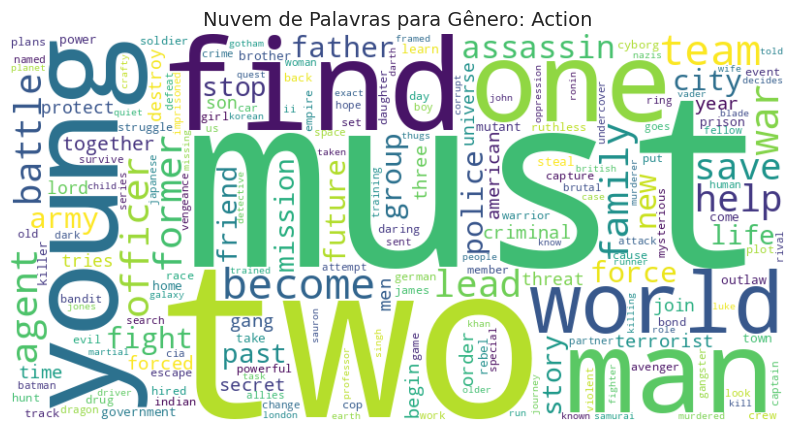

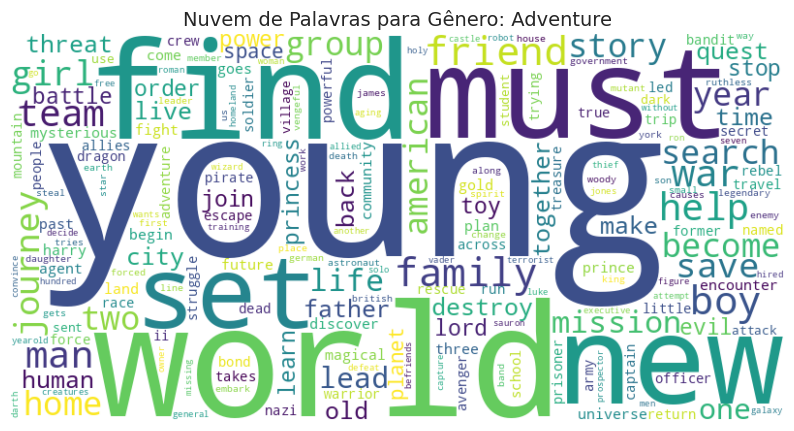

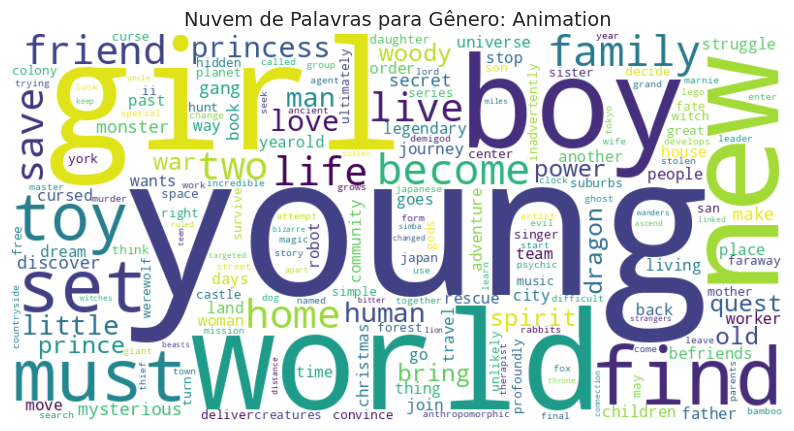

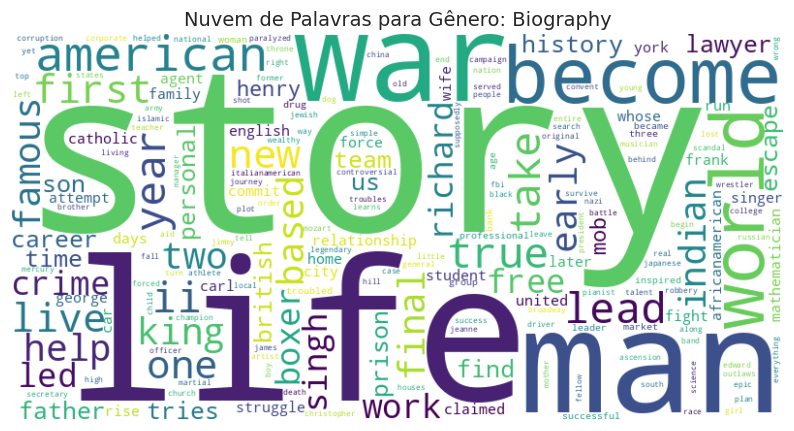

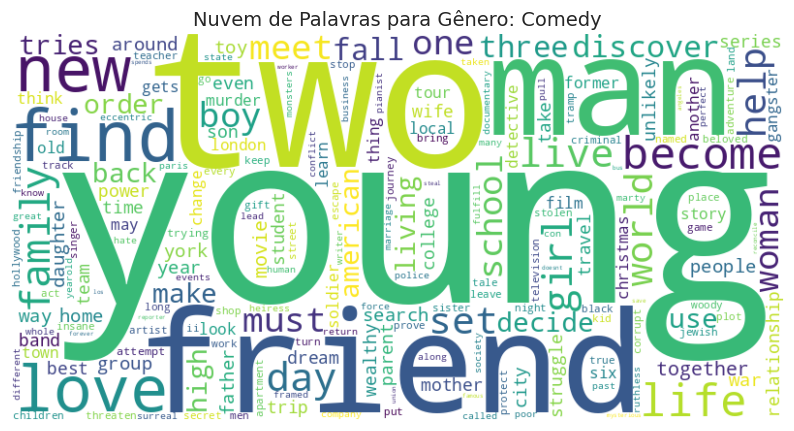

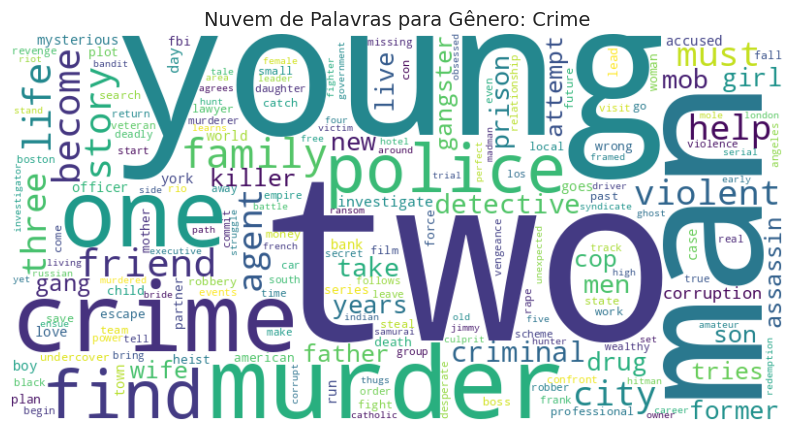

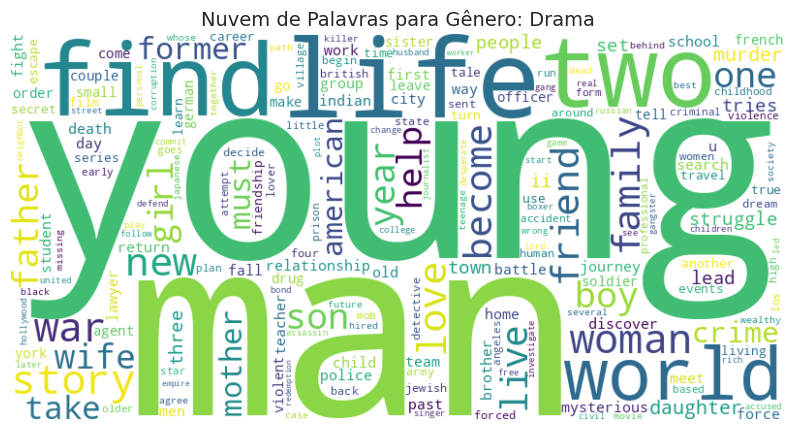

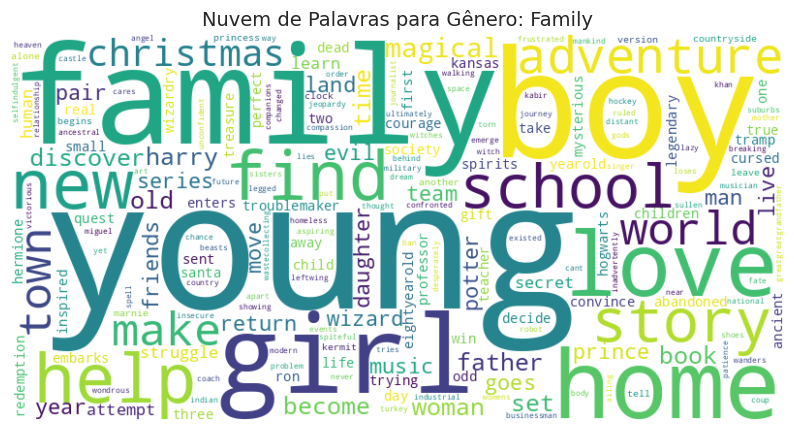

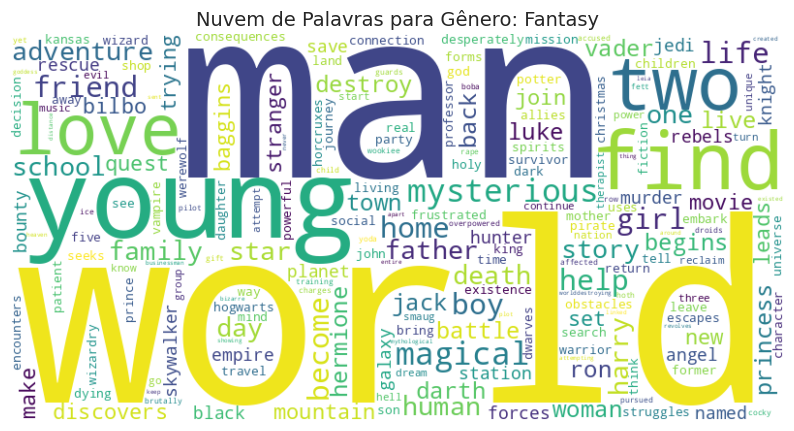

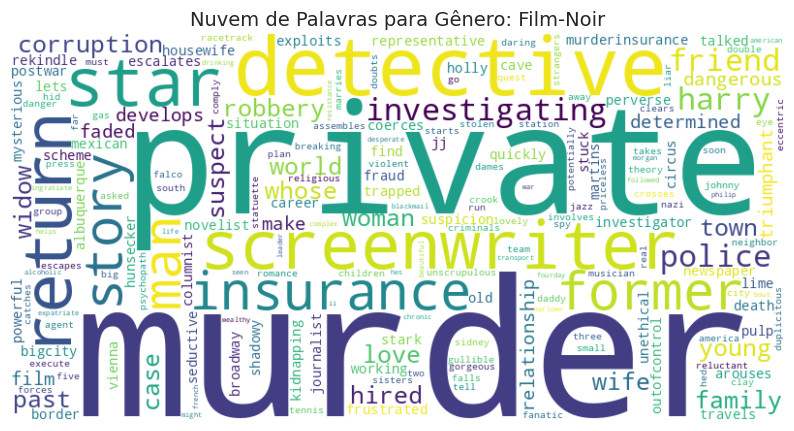

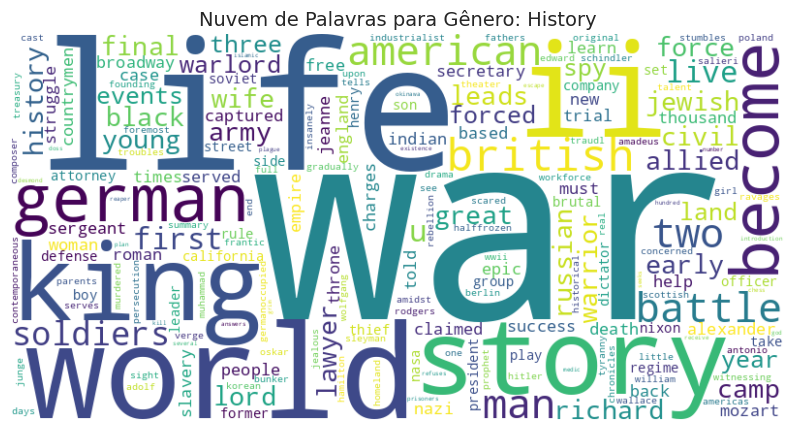

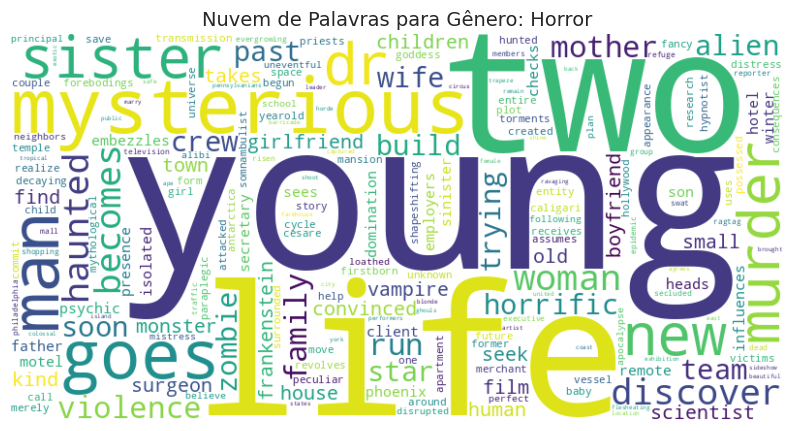

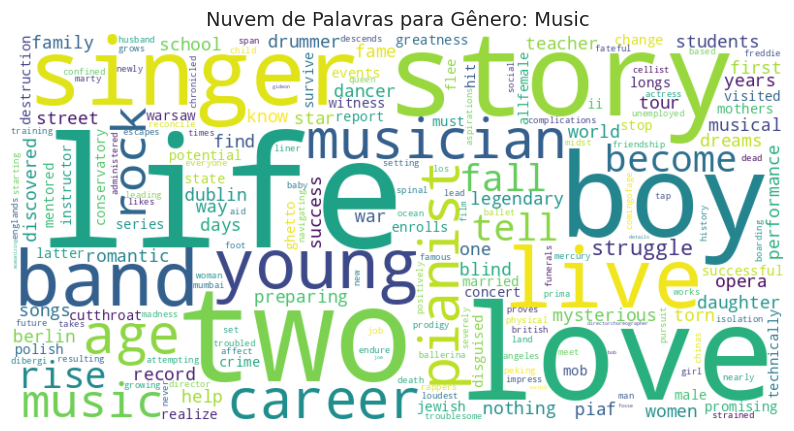

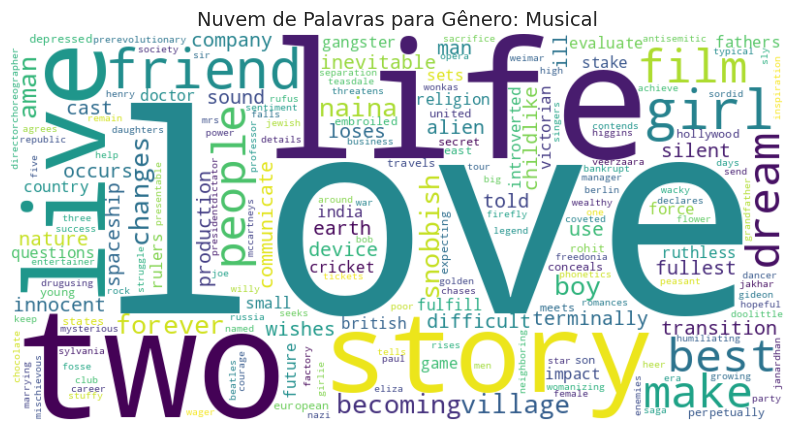

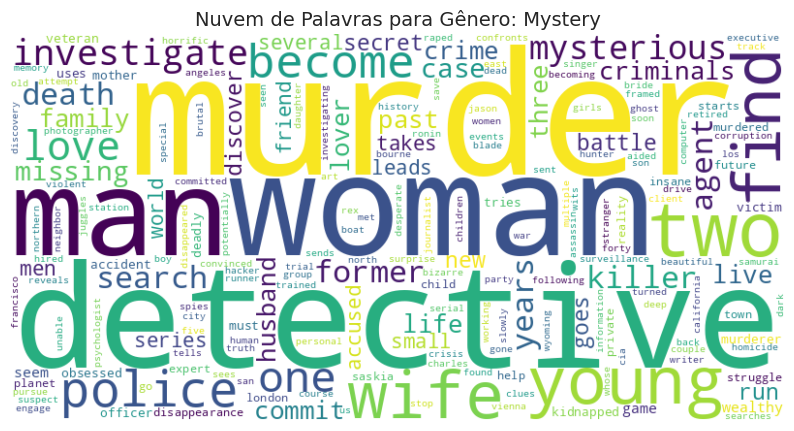

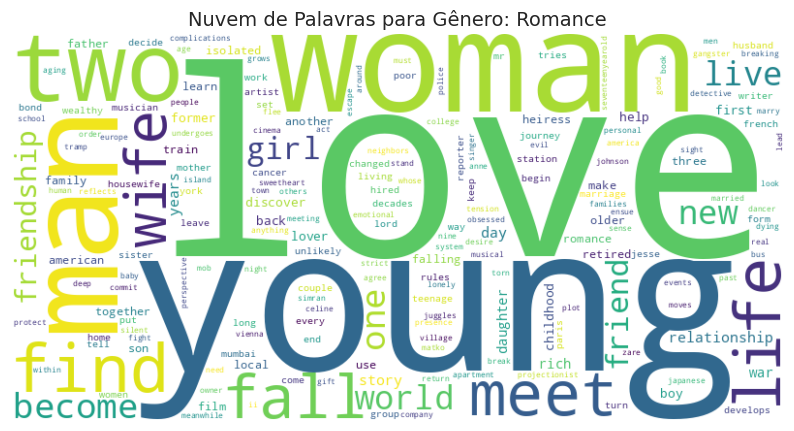

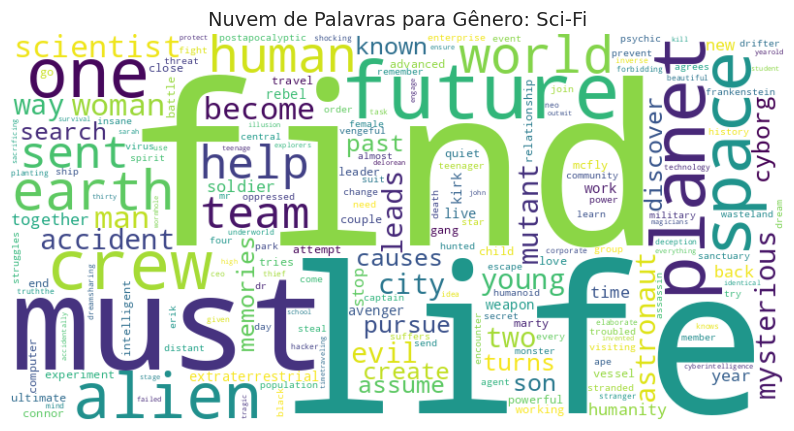

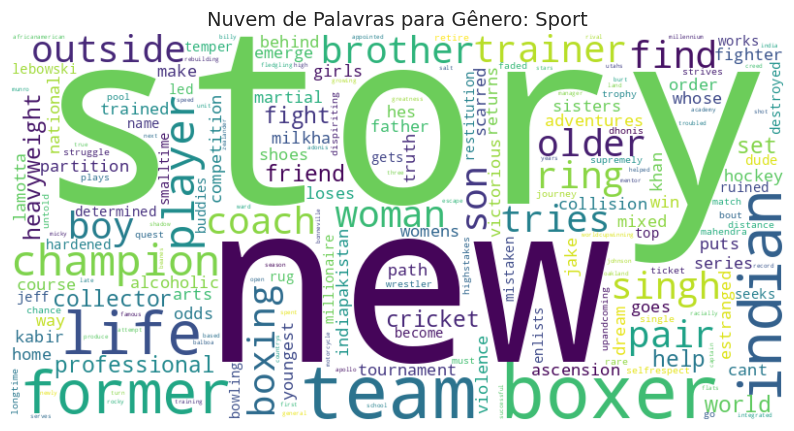

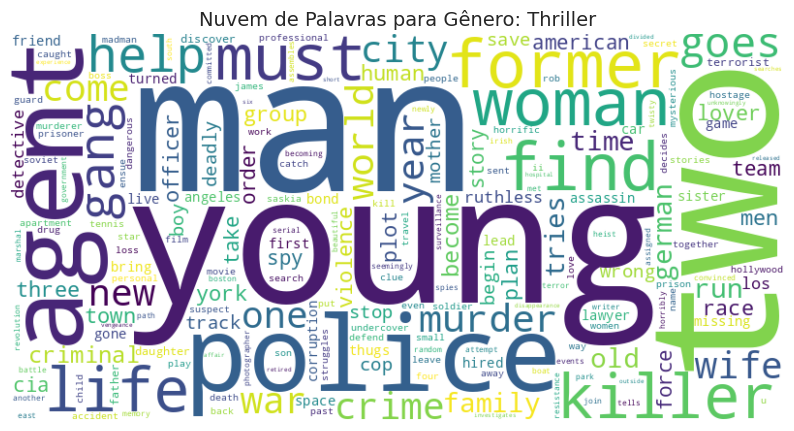

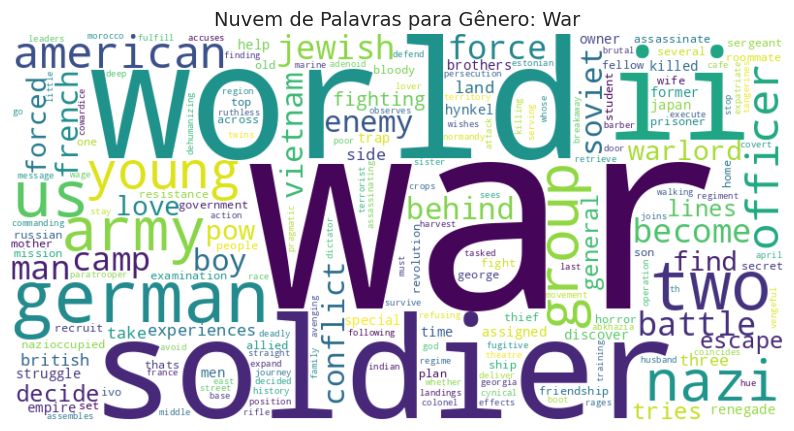

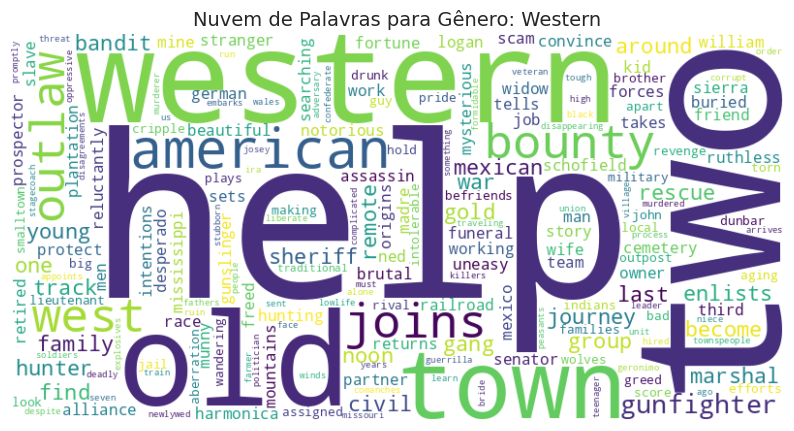

In [195]:
# VISUALIZAÇÃO: WORD CLOUDS POR GÊNERO
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Gerar e exibir Word Clouds para cada gênero

if 'genre_words' in globals() and genre_words:
    display("\nGerando Word Clouds por Gênero...")
    # Ordenar gêneros por nome para consistência (opcional)
    sorted_genres = sorted(genre_words.keys())

    for genre in sorted_genres: # Iterar sobre os gêneros ordenados
        words = genre_words[genre] # Obter a lista de palavras para o gênero
        if words: # Garantir que há palavras para o gênero
            genre_text = " ".join(words)
            # Ajustar parâmetros para melhor visualização se necessário
            # collocations=False para evitar que o WordCloud tente encontrar frases
            wordcloud_genre = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(genre_text)

            plt.figure(figsize=(10, 8))
            plt.imshow(wordcloud_genre, interpolation='bilinear')
            plt.axis("off")
            # Traduzir o título
            plt.title(f'Nuvem de Palavras para Gênero: {genre}', fontsize=14) # Título mais claro
            plt.show()
        else:
            print(f"Não há palavras suficientes para gerar Word Cloud para o gênero: {genre}")
else:
    print("Dados de palavras por gênero ('genre_words') não encontrados ou vazios. Não é possível gerar Word Clouds por gênero.")

'\nGerando Word Cloud geral das sinopses...'

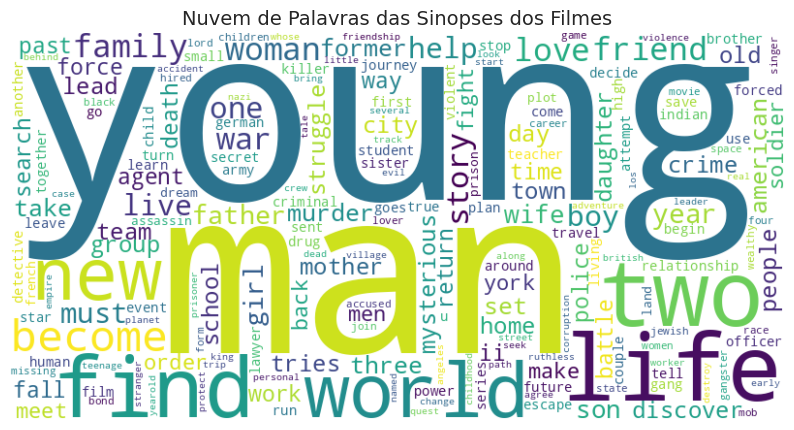

In [196]:
# VISUALIZAÇÃO: WORD CLOUD GERAL DAS SINOPSES
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Gerar e exibir Word Cloud geral das sinopses limpas
# Verificar se o DataFrame e a coluna limpa existem e não estão vazios
if 'df' in globals() and df is not None and 'Cleaned_Overview' in df.columns and not df['Cleaned_Overview'].empty:
    display("\nGerando Word Cloud geral das sinopses...")

    # Combinar todo o texto da coluna 'Cleaned_Overview' em uma única string
    # Usar .dropna() para garantir que apenas sinopses não nulas sejam incluídas
    # Filtrar também por sinopses limpas não vazias antes de juntar
    all_overview_text = " ".join(df['Cleaned_Overview'].dropna()[df['Cleaned_Overview'].dropna() != ""])

    if all_overview_text: # Verificar se a string combinada não está vazia
        # Criar um objeto WordCloud
        # Ajustar parâmetros para melhor visualização se necessário
        # collocations=False para evitar que o WordCloud tente encontrar frases
        wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(all_overview_text)

        # Exibir a Word Cloud
        plt.figure(figsize=(10, 8))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off") # Remover eixos
        # Traduzir o título
        plt.title('Nuvem de Palavras das Sinopses dos Filmes', fontsize=14) # Título mais claro
        plt.show()
    else:
        print("Nenhuma sinopse limpa encontrada para gerar a Word Cloud geral.")
else:
    print("DataFrame ou coluna 'Cleaned_Overview' não encontrados ou vazios. Não é possível gerar a Word Cloud geral.")

In [197]:
# PREPARAÇÃO DOS DADOS PARA MODELAGEM: SELEÇÃO DE FEATURES E TRATAMENTO INICIAL E TARGET ENCODING
# Selecionar colunas relevantes para a modelagem
features = ['Meta_score', 'No_of_Votes', 'Genre', 'Director', 'Star1', 'Star2', 'Star3', 'Star4']
target = 'IMDB_Rating' # Definir a variável alvo

# Garantir que o DataFrame original (df) existe antes de prosseguir
if df is not None:
    display("\nPreparando dados para modelagem...")
    # Garantir que apenas as colunas que existem no df original sejam selecionadas
    existing_features = [col for col in features if col in df.columns]
    if target in df.columns:
        df_model = df[existing_features + [target]].copy()
    else:
        print(f"Aviso: Coluna target '{target}' não encontrada no DataFrame original.")
        df_model = df[existing_features].copy()

    # Tratar valores ausentes na coluna 'Meta_score' preenchendo com a média
    # Usar .loc para evitar SettingWithCopyWarning e garantir que a operação seja no DataFrame copiado
    if 'Meta_score' in df_model.columns:
        # Calcular a média APENAS dos valores NÃO-NULOS existentes na coluna 'Meta_score'
        meta_score_mean = df_model['Meta_score'].mean()
        df_model.loc[:, 'Meta_score'] = df_model['Meta_score'].fillna(meta_score_mean)
        print(f"Valores ausentes em 'Meta_score' preenchidos com a média ({meta_score_mean:.2f}).")
    else:
        print("Aviso: Coluna 'Meta_score' não encontrada em df_model para tratamento de ausentes.")


    # Tratamento de valores ausentes nas colunas Star preenchendo com 'Unknown'
    star_cols = ['Star1', 'Star2', 'Star3', 'Star4']
    for col in star_cols:
        if col in df_model.columns:
            df_model.loc[:, col] = df_model[col].fillna('Unknown')
            # print(f"Valores ausentes em '{col}' preenchidos com 'Unknown'.") # Opcional: confirmar preenchimento
        else:
            print(f"Aviso: Coluna '{col}' não encontrada em df_model para tratamento de ausentes.")


    # Aplicar Target Encoding para Director e Star columns AQUI, depois que target e df_model são definidos
    display("\nAplicando Target Encoding a 'Director' e colunas 'Star'...")
    categorical_cols_for_target_encoding = ['Director', 'Star1', 'Star2', 'Star3', 'Star4']

    for col in categorical_cols_for_target_encoding:
        if col in df_model.columns and target in df_model.columns:
            # Calcular a média da variável alvo (IMDB_Rating) para cada categoria nos dados de treino (df_model)
            mean_target_encoding = df_model.groupby(col)[target].transform('mean')
            # Substitua a coluna original pelos valores codificados por target encoding
            df_model.loc[:, col] = mean_target_encoding
            print(f"Target Encoding aplicado à coluna '{col}'.") # Opcional: confirmar encoding
        elif col in df_model.columns:
             print(f"Aviso: Coluna target '{target}' não encontrada para aplicar Target Encoding na coluna '{col}'.")
             # Se a coluna target não existe, a coluna categórica não pode ser Target Encoded.
             # Poderíamos considerar dropar a coluna categórica ou usar outro método de encoding.
             # Por enquanto, vamos deixar a coluna como está (com 'Unknown' para NaNs).
        else:
            print(f"Aviso: Coluna '{col}' não encontrada em df_model para Target Encoding.")

    # Exiba as primeiras linhas do DataFrame modificado para verificar o encoding
    display("\nPrimeiras 5 linhas do DataFrame após Target Encoding:")
    display(df_model.head())
    # Opcional: Verificar tipos de dados para confirmar que se tornaram numéricos
    # display("\nTipos de dados após Target Encoding:")


    # Verificar se ainda há valores ausentes nas colunas selecionadas (além das colunas de estrelas e diretor, que trataremos depois)
    display("\nValores ausentes nas features selecionadas antes do One-Hot Encoding de Gênero:")
    display(df_model.isnull().sum())

else:
    print("DataFrame original (df) não carregado. Não é possível preparar dados para modelagem.")
    df_model = None # Definir df_model como None se df não existir

'\nPreparando dados para modelagem...'

Valores ausentes em 'Meta_score' preenchidos com a média (77.97).


"\nAplicando Target Encoding a 'Director' e colunas 'Star'..."

Target Encoding aplicado à coluna 'Director'.
Target Encoding aplicado à coluna 'Star1'.
Target Encoding aplicado à coluna 'Star2'.
Target Encoding aplicado à coluna 'Star3'.
Target Encoding aplicado à coluna 'Star4'.


'\nPrimeiras 5 linhas do DataFrame após Target Encoding:'

Meta_score  No_of_Votes                     Genre Director   Star1  \
0       100.0      1620367              Crime, Drama      8.4    8.65   
1        84.0      2303232      Action, Crime, Drama   8.4625  8.1125   
2        90.0      1129952              Crime, Drama      8.4    8.01   
3        96.0       689845              Crime, Drama      8.1     8.5   
4        94.0      1642758  Action, Adventure, Drama      8.4     8.8   

      Star2 Star3  Star4  IMDB_Rating  
0       8.3   9.2    9.1          9.2  
1      8.35   9.0  8.275          9.0  
2  8.566667   8.7    9.1          9.0  
3       9.0  8.35    9.0          9.0  
4      8.25   8.9    8.8          8.9

'\nValores ausentes nas features selecionadas antes do One-Hot Encoding de Gênero:'

Meta_score     0
No_of_Votes    0
Genre          0
Director       0
Star1          0
Star2          0
Star3          0
Star4          0
IMDB_Rating    0
dtype: int64

In [198]:
# PRÉ-PROCESSAMENTO: ONE-HOT ENCODING PARA GÊNERO E TRATAMENTO DE AUSENTES EM STAR
# Manipulação da coluna 'Genre' - One-Hot Encoding e Manipulação de colunas Star
# Verificar se df_model existe e não é None antes de prosseguir
if 'df_model' in globals() and df_model is not None:
    display("\nAplicando One-Hot Encoding em 'Genre' e tratando colunas 'Star'...")

    # Manipulação da coluna 'Genre' - One-Hot Encoding
    # Primeiro, separe os gêneros e crie uma lista de gêneros únicos
    if 'Genre' in df_model.columns:
        # Garantir que a coluna Genre seja string antes de split
        df_model['Genre'] = df_model['Genre'].astype(str)
        # Usar explode() para expandir a lista de gêneros em novas linhas
        all_genres = df_model['Genre'].str.replace(' ', '').str.split(',').explode().unique()
        # Remover possíveis gêneros vazios da lista
        all_genres = [g for g in all_genres if g and pd.notna(g)]


        # Crie variáveis dummy (colunas binárias) para cada gênero
        # É mais eficiente usar pd.get_dummies() diretamente para One-Hot Encoding
        genre_dummies = df_model['Genre'].str.replace(' ', '').str.get_dummies(sep=',')

        # Juntar as novas colunas dummy ao DataFrame original
        # Usar .join() é uma forma segura de adicionar colunas
        df_model = df_model.join(genre_dummies)

        # Remova a coluna 'Genre' original
        df_model = df_model.drop('Genre', axis=1)
        print("\nOne-Hot Encoding aplicado à coluna 'Genre'.")
    else:
        print("Aviso: Coluna 'Genre' não encontrada em df_model para One-Hot Encoding.")

    # Manipulação de valores ausentes nas colunas Star antes do encoding
    star_cols = ['Star1', 'Star2', 'Star3', 'Star4']
    for col in star_cols:
        if col in df_model.columns:
            # Usar .loc para evitar SettingWithCopyWarning
            df_model.loc[:, col] = df_model[col].fillna('Unknown') # Preencher NaNs com 'Unknown'
            # print(f"Valores ausentes em '{col}' preenchidos com 'Unknown'.") # Opcional: confirmar preenchimento
        else:
            print(f"Aviso: Coluna '{col}' não encontrada em df_model para tratamento de ausentes.")

    display("\nPrimeiras 5 linhas do DataFrame após One-Hot Encoding de Gênero e tratamento de ausentes em Star:")
    display(df_model.head())
    display("\nVerificando valores ausentes nas colunas Star após tratamento:")
    display(df_model[star_cols].isnull().sum())


else:
    print("DataFrame df_model não carregado. Não é possível aplicar encoding ou tratar colunas Star.")

"\nAplicando One-Hot Encoding em 'Genre' e tratando colunas 'Star'..."


One-Hot Encoding aplicado à coluna 'Genre'.


/tmp/ipython-input-3938534509.py:37: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_model.loc[:, col] = df_model[col].fillna('Unknown') # Preencher NaNs com 'Unknown'


'\nPrimeiras 5 linhas do DataFrame após One-Hot Encoding de Gênero e tratamento de ausentes em Star:'

Meta_score  No_of_Votes Director   Star1     Star2 Star3  Star4  \
0       100.0      1620367      8.4    8.65       8.3   9.2    9.1   
1        84.0      2303232   8.4625  8.1125      8.35   9.0  8.275   
2        90.0      1129952      8.4    8.01  8.566667   8.7    9.1   
3        96.0       689845      8.1     8.5       9.0  8.35    9.0   
4        94.0      1642758      8.4     8.8      8.25   8.9    8.8   

   IMDB_Rating  Action  Adventure  ...  Horror  Music  Musical  Mystery  \
0          9.2       0          0  ...       0      0        0        0   
1          9.0       1          0  ...       0      0        0        0   
2          9.0       0          0  ...       0      0        0        0   
3          9.0       0          0  ...       0      0        0        0   
4          8.9       1          1  ...       0      0        0        0   

   Romance  Sci-Fi  Sport  Thriller  War  Western  
0        0       0      0         0    0        0  
1        0       0      0         0    0        0  
2        0       0      0         0    0        0  
3        0       0      0         0    0        0  
4        0       0      0         0    0        0  

[5 rows x 29 columns]

'\nVerificando valores ausentes nas colunas Star após tratamento:'

Star1    0
Star2    0
Star3    0
Star4    0
dtype: int64

In [199]:
# PRÉ-PROCESSAMENTO: TARGET ENCODING PARA DIRECTOR E STAR
# Aplicar Target Encoding às colunas Director e Star
# Verificar se df_model existe e contém a coluna target antes de prosseguir
if 'df_model' in globals() and df_model is not None and target in df_model.columns:
    display("\nAplicando Target Encoding a 'Director' e colunas 'Star'...")

    categorical_cols_for_target_encoding = ['Director', 'Star1', 'Star2', 'Star3', 'Star4']
    # target já definido como 'IMDB_Rating'

    for col in categorical_cols_for_target_encoding:
        if col in df_model.columns:
            # Calcular a média da variável alvo (IMDB_Rating) para cada categoria
            # Usar .transform('mean') para obter uma série com as médias alinhada ao DataFrame original
            # Tratar NaNs na coluna target ao calcular a média, se houver (groupby().mean() já faz isso por padrão)
            mean_target_encoding = df_model.groupby(col)[target].transform('mean')
            # Substitua a coluna original pelos valores codificados por target encoding
            # Usar .loc para evitar SettingWithCopyWarning
            df_model.loc[:, col] = mean_target_encoding
            print(f"Target Encoding aplicado à coluna '{col}'.") # Opcional: confirmar encoding
        else:
            print(f"Aviso: Coluna '{col}' não encontrada em df_model para Target Encoding.")


    # Exiba as primeiras linhas do DataFrame modificado para verificar o encoding
    display("\nPrimeiras 5 linhas do DataFrame após Target Encoding:")
    display(df_model.head())
    # Opcional: Verificar tipos de dados para confirmar que se tornaram numéricos
    # display("\nTipos de dados após Target Encoding:")

else:
    # Removendo a referência a 'target' no print para evitar NameError nesta célula
    print("DataFrame df_model não carregado ou coluna target não encontrada. Não é possível aplicar Target Encoding.")

"\nAplicando Target Encoding a 'Director' e colunas 'Star'..."

Target Encoding aplicado à coluna 'Director'.
Target Encoding aplicado à coluna 'Star1'.
Target Encoding aplicado à coluna 'Star2'.
Target Encoding aplicado à coluna 'Star3'.
Target Encoding aplicado à coluna 'Star4'.


'\nPrimeiras 5 linhas do DataFrame após Target Encoding:'

Meta_score  No_of_Votes Director   Star1     Star2 Star3  Star4  \
0       100.0      1620367      8.4    8.65       8.3   9.2    9.1   
1        84.0      2303232   8.4625  8.1125      8.35   9.0  8.275   
2        90.0      1129952      8.4    8.01  8.566667   8.7    9.1   
3        96.0       689845      8.1     8.5       9.0  8.35    9.0   
4        94.0      1642758      8.4     8.8      8.25   8.9    8.8   

   IMDB_Rating  Action  Adventure  ...  Horror  Music  Musical  Mystery  \
0          9.2       0          0  ...       0      0        0        0   
1          9.0       1          0  ...       0      0        0        0   
2          9.0       0          0  ...       0      0        0        0   
3          9.0       0          0  ...       0      0        0        0   
4          8.9       1          1  ...       0      0        0        0   

   Romance  Sci-Fi  Sport  Thriller  War  Western  
0        0       0      0         0    0        0  
1        0       0      0         0    0        0  
2        0       0      0         0    0        0  
3        0       0      0         0    0        0  
4        0       0      0         0    0        0  

[5 rows x 29 columns]

In [200]:
# DIVISÃO DOS DADOS EM TREINO E TESTE
from sklearn.model_selection import train_test_split

# Definir features (X) e target (y)
# Garantir que df_model existe e contém a coluna target
if 'df_model' in globals() and df_model is not None and target in df_model.columns:
    display("\nDividindo dados em conjuntos de treino e teste...")
    # target já definido como 'IMDB_Rating'

    # X são todas as colunas exceto a target
    X = df_model.drop(target, axis=1)
    # y é a coluna target
    y = df_model[target]

    # Dividir os dados em conjuntos de treino e teste (por exemplo, 80% treino, 20% teste)
    # Usar stratify=y NÃO é adequado para regressão (variável numérica contínua).
    # random_state para reprodutibilidade
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    display("Formato dos conjuntos de treino e teste:")
    display(f"X_train: {X_train.shape}")
    display(f"X_test: {X_test.shape}")
    display(f"y_train: {y_train.shape}")
    display(f"y_test: {y_test.shape}")

    print("\nDados divididos com sucesso.")

else:
    print(f"DataFrame df_model ou coluna target ('{target}') não encontrados. Não é possível dividir os dados.")

'\nDividindo dados em conjuntos de treino e teste...'

'Formato dos conjuntos de treino e teste:'

'X_train: (799, 28)'

'X_test: (200, 28)'

'y_train: (799,)'

'y_test: (200,)'


Dados divididos com sucesso.


In [201]:
# TREINAMENTO DO MODELO DE REGRESSÃO LINEAR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Verificar se os conjuntos de treino existem antes de treinar o modelo
if 'X_train' in globals() and 'y_train' in globals() and X_train is not None and y_train is not None:
    display("\nTreinando Modelo de Regressão Linear...")
    # Inicializar e treinar o modelo de Regressão Linear
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)
    print("Modelo Linear treinado.")

    # Fazer previsões no conjunto de teste
    if 'X_test' in globals() and X_test is not None:
        y_pred_linear = linear_model.predict(X_test)
        print("Previsões do Modelo Linear realizadas.")

        # Mostrar as primeiras previsões e os valores reais
        display("\nPrimeiras 10 Previsões do Modelo Linear vs. Valores Reais:")
        # Criar DataFrame apenas se y_test e y_pred_linear existirem e tiverem dados
        if 'y_test' in globals() and y_test is not None and len(y_test) > 0 and len(y_pred_linear) > 0:
             # Garantir que y_test é uma série ou DataFrame para usar .head()
             if isinstance(y_test, pd.Series) or isinstance(y_test, pd.DataFrame):
                 display(pd.DataFrame({'Real': y_test.head(10), 'Previsto Linear': y_pred_linear[:10]}))
             else:
                 # Se y_test não for pandas Series/DataFrame, apenas mostre os primeiros elementos
                 display(pd.DataFrame({'Real': y_test[:10], 'Previsto Linear': y_pred_linear[:10]}))
        else:
             print("Dados de teste (y_test) ou previsões do modelo linear (y_pred_linear) não disponíveis para exibição.")

    else:
        print("Conjunto de teste (X_test) não encontrado. Não é possível fazer previsões com o Modelo Linear.")

else:
    print("Conjuntos de treino (X_train, y_train) não encontrados. Não é possível treinar o Modelo Linear.")

'\nTreinando Modelo de Regressão Linear...'

Modelo Linear treinado.
Previsões do Modelo Linear realizadas.


'\nPrimeiras 10 Previsões do Modelo Linear vs. Valores Reais:'

Real  Previsto Linear
453   8.0         8.002028
793   7.7         7.687297
209   8.1         8.114693
309   8.1         8.096118
740   7.7         7.697197
578   7.8         7.791173
895   7.6         7.601617
545   7.9         7.874417
436   8.0         8.009953
678   7.8         7.790151

In [202]:
# AVALIAÇÃO DO MODELO DE REGRESSÃO LINEAR
# Avaliar o Modelo de Regressão Linear
# Verificar se as previsões e os valores reais de teste existem antes da avaliação
if 'y_test' in globals() and 'y_pred_linear' in globals() and y_test is not None and y_pred_linear is not None and len(y_test) > 0 and len(y_pred_linear) > 0:
    display("\nAvaliando Modelo de Regressão Linear...")
    # Calcular RMSE
    rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))

    # Calcular R-squared
    r2_linear = r2_score(y_test, y_pred_linear)

    display(f"\nAvaliação do Modelo de Regressão Linear:")
    display(f"RMSE: {rmse_linear:.4f}")
    display(f"R-squared: {r2_linear:.4f}")

else:
    print("Dados de teste (y_test) ou previsões do modelo linear (y_pred_linear) não encontrados. Não é possível avaliar o Modelo Linear.")

'\nAvaliando Modelo de Regressão Linear...'

'\nAvaliação do Modelo de Regressão Linear:'

'RMSE: 0.0521'

'R-squared: 0.9586'

In [203]:
# TREINAMENTO DO MODELO RANDOM FOREST REGRESSOR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score # Garantir imports se necessário
import numpy as np # Garantir imports se necessário

# Verificar se os conjuntos de treino existem antes de treinar o modelo
if 'X_train' in globals() and 'y_train' in globals() and X_train is not None and y_train is not None:
    display("\nTreinando Modelo Random Forest Regressor...")
    # Inicializar e treinar o modelo Random Forest Regressor
    # Podemos ajustar os hiperparâmetros depois para tentar melhorar a performance
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42) # Usando 100 árvores como um ponto de partida
    rf_model.fit(X_train, y_train)
    print("Modelo Random Forest treinado.")

    # Fazer previsões no conjunto de teste
    if 'X_test' in globals() and X_test is not None:
        y_pred_rf = rf_model.predict(X_test)
        print("Previsões do Modelo Random Forest realizadas.")

        # Avaliar o modelo Random Forest
        # Verificar se as previsões e os valores reais de teste existem antes da avaliação
        if 'y_test' in globals() and y_test is not None and len(y_test) > 0 and len(y_pred_rf) > 0:
            rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
            r2_rf = r2_score(y_test, y_pred_rf)

            display(f"\nAvaliação do Modelo Random Forest Regressor:")
            display(f"RMSE: {rmse_rf:.4f}")
            display(f"R-squared: {r2_rf:.4f}")
        else:
             print("Dados de teste (y_test) ou previsões do modelo Random Forest (y_pred_rf) não disponíveis para avaliação.")

    else:
        print("Conjunto de teste (X_test) não encontrado. Não é possível fazer previsões com o Modelo Random Forest.")

else:
    print("Conjuntos de treino (X_train, y_train) não encontrados. Não é possível treinar o Modelo Random Forest.")

'\nTreinando Modelo Random Forest Regressor...'

Modelo Random Forest treinado.
Previsões do Modelo Random Forest realizadas.


'\nAvaliação do Modelo Random Forest Regressor:'

'RMSE: 0.0412'

'R-squared: 0.9742'

### Previsão para Filme Específico: The Shawshank Redemption

Vamos usar o modelo treinado (o Random Forest) para prever a nota do IMDB para o filme "The Shawshank Redemption" com as características fornecidas no desafio.

In [204]:
# PREVISÃO PARA FILME ESPECÍFICO ('THE SHAWSHANK REDEMPTION')
# Previsão para o filme "The Shawshank Redemption"
# Verificar se o modelo Random Forest (rf_model) e os dados de treino necessários para pré-processamento (df_model, X_train) existem
if 'rf_model' in globals() and rf_model is not None and 'df_model' in globals() and df_model is not None and 'X_train' in globals() and hasattr(X_train, 'columns'):
    display("Realizando previsão para 'The Shawshank Redemption'...")

    # Características do filme "The Shawshank Redemption" fornecidas pelo usuário
    shawshank_redemption_data = {
        'Series_Title': 'The Shawshank Redemption',
        'Released_Year': '1994',
        'Certificate': 'A',
        'Runtime': '142 min',
        'Genre': 'Drama',
        'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
        'Meta_score': 80.0,
        'Director': 'Frank Darabont',
	'Star1': 'Tim Robbins',
        'Star2': 'Morgan Freeman',
        'Star3': 'Bob Gunton',
        'Star4': 'William Sadler',
        'No_of_Votes': 2343110,
        'Gross': '28,341,469' # Nota: Gross não é usado nas features do nosso modelo atual
    }

    # Criar um DataFrame com os dados do filme
    shawshank_df = pd.DataFrame([shawshank_redemption_data])

    # Aplicar as mesmas transformações de feature engineering e encoding
    # Precisamos garantir que as colunas sejam as mesmas que X_train
    # Selecionar as features usadas no modelo
    features_for_prediction = ['Meta_score', 'No_of_Votes', 'Genre', 'Director', 'Star1', 'Star2', 'Star3', 'Star4']
    shawshank_processed = shawshank_df[features_for_prediction].copy()

    # Tratar valores ausentes na coluna 'Meta_score' (embora não haja neste exemplo, é bom manter a consistência)
    if 'Meta_score' in shawshank_processed.columns and 'Meta_score' in df_model.columns:
        # Usar .loc para evitar SettingWithCopyWarning e garantir a modificação no DataFrame
        shawshank_processed.loc[:, 'Meta_score'] = pd.to_numeric(shawshank_processed['Meta_score'], errors='coerce').fillna(df_model['Meta_score'].mean())
    else:
        print("Aviso: Coluna 'Meta_score' não encontrada ou média de treino não disponível para Shawshank.")


    # Target Encoding para Director e Star columns
    categorical_cols_for_target_encoding = ['Director', 'Star1', 'Star2', 'Star3', 'Star4']

    # Calcular o fallback_mean ANTES do loop de Target Encoding
    fallback_mean = df_model['IMDB_Rating'].mean() if 'IMDB_Rating' in df_model.columns else 0

    # Usar as médias calculadas nos dados de treino para o Target Encoding
    # Para novas categorias (que não apareceram no treino), use a média geral do treino como fallback
    for col in categorical_cols_for_target_encoding:
        if col in shawshank_processed.columns and 'IMDB_Rating' in df_model.columns and col in df_model.columns:
            # Calcular o mapping de target encoding nos DADOS DE TREINO (df_model)
            mean_target_encoding_train = df_model.groupby(col)['IMDB_Rating'].mean()
            # Mapear os valores da coluna para as médias calculadas
            # Usar .loc para evitar SettingWithCopyWarning
            shawshank_processed.loc[:, col] = shawshank_processed[col].map(mean_target_encoding_train).fillna(fallback_mean)
            # Fallback para novas categorias usando a média geral do treino
            # Corrigindo FutureWarning: Usar .fillna() e atribuir de volta
            if 'IMDB_Rating' in df_model.columns:
                 shawshank_processed.loc[:, col] = shawshank_processed.loc[:, col].fillna(df_model['IMDB_Rating'].mean())
            else:
                 shawshank_processed.loc[:, col] = shawshank_processed.loc[:, col].fillna(0) # Fallback se a média geral não estiver disponível
        else:
             print(f"Aviso: Coluna '{col}' não encontrada ou dados de treino insuficientes para Target Encoding de Shawshank.")


    # One-Hot Encoding para Genre
    # Precisamos garantir que todas as colunas de gênero do treino estejam presentes, mesmo que sejam 0
    if 'Genre' in shawshank_processed.columns and 'columns' in dir(X_train): # Verificar se X_train.columns existe
        # Garantir que a coluna Genre seja string para split
        shawshank_processed['Genre'] = shawshank_processed['Genre'].astype(str)
        # Crie variáveis dummy para o novo ponto de dado
        shawshank_genre_encoded = shawshank_processed['Genre'].str.replace(' ', '').str.get_dummies(sep=',')

        # Criar o DataFrame final com as colunas na ordem correta de X_train
        # Criar um DataFrame com todas as colunas de X_train, preenchido com 0s
        shawshank_final_processed = pd.DataFrame(0, index=shawshank_processed.index, columns=X_train.columns)

        # Copiar os valores das colunas processadas (numéricas e target encoded)
        cols_to_copy_from_processed = ['Meta_score', 'No_of_Votes'] + categorical_cols_for_target_encoding
        for col in cols_to_copy_from_processed:
             if col in shawshank_processed.columns and col in shawshank_final_processed.columns:
                  # Usar .loc para evitar SettingWithCopyWarning
                  # E garantir que o dtype seja compatível, convertendo se necessário
                  # Inferir dtype do X_train
                  expected_dtype = X_train[col].dtype
                  # Converter para o dtype esperado antes de atribuir
                  shawshank_final_processed.loc[:, col] = shawshank_processed[col].astype(expected_dtype)


        # Copiar os valores das colunas de gênero codificadas
        for col in shawshank_genre_encoded.columns:
             if col in shawshank_final_processed.columns: # Garantir que a coluna de gênero existia em X_train
                  # Usar .loc para evitar SettingWithCopyWarning
                  # E garantir que o dtype seja compatível (geralmente int ou uint para OHE)
                  expected_dtype = X_train[col].dtype
                  # Converter para o dtype esperado antes de atribuir
                  shawshank_final_processed.loc[:, col] = shawshank_genre_encoded[col].astype(expected_dtype)


        # Garantir que a ordem final das colunas é a mesma de X_train
        # Isso já foi feito ao criar shawshank_final_processed com X_train.columns
        # Mas uma verificação final pode ser útil:
        #     print("Aviso: As colunas do DataFrame processado não correspondem às colunas de X_train.")
        #     # Tentar reordenar as colunas para corresponder a X_train, se possível
        #     try:
        #         shawshank_final_processed = shawshank_final_processed[X_train.columns]
        #     except KeyError as e:
        #         print(f"Erro ao reordenar colunas para previsão: {e}. Algumas colunas de X_train estão faltando no dado de entrada processado.")


        # Fazer a previsão usando o modelo Random Forest treinado
        predicted_imdb_rating = rf_model.predict(shawshank_final_processed)

        display(f"A nota prevista do IMDB para 'The Shawshank Redemption' é: {predicted_imdb_rating[0]:.4f}")

    else:
        print("Coluna 'Genre' não encontrada ou X_train.columns não disponível. Não é possível aplicar One-Hot Encoding para Shawshank.")

else:
    print("Modelo Random Forest (rf_model), DataFrame de modelo (df_model) ou X_train não encontrados. Não é possível fazer a previsão para 'The Shawshank Redemption'.")

"Realizando previsão para 'The Shawshank Redemption'..."

/tmp/ipython-input-755948112.py:60: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  shawshank_processed.loc[:, col] = shawshank_processed.loc[:, col].fillna(df_model['IMDB_Rating'].mean())
/tmp/ipython-input-755948112.py:60: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  shawshank_processed.loc[:, col] = shawshank_processed.loc[:, col].fillna(df_model['IMDB_Rating'].mean())
/tmp/ipython-input-755948112.py:60: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects

"A nota prevista do IMDB para 'The Shawshank Redemption' é: 8.0120"

In [205]:
# RECOMENDAÇÃO DE FILME PARA PESSOA DESCONHECIDA
# Recomendar um filme para uma pessoa desconhecida
# Verificar se o DataFrame original (df) existe e contém as colunas necessárias
if df is not None and 'IMDB_Rating' in df.columns and 'No_of_Votes' in df.columns and 'Series_Title' in df.columns and 'Genre' in df.columns and 'Director' in df.columns and 'Star1' in df.columns:
    display("\nRecomendação de filme para uma pessoa desconhecida:")

    # Podemos considerar filmes com alta nota do IMDB e um alto número de votos
    # Para evitar recomendar filmes muito pouco conhecidos com notas altas por acaso,
    # podemos filtrar por um número mínimo de votos, se desejado.
    # Exemplo: filtrar filmes com pelo menos 10000 votos
    # df_filtered = df[df['No_of_Votes'] >= 10000].copy()

    # Usando o DataFrame completo, ordenando por nota e votos como critério principal
    # Garantir que as colunas de ordenação sejam numéricas
    # Já convertemos IMDB_Rating e No_of_Votes para numérico na EDA ou pré-processamento,
    # mas garantimos aqui novamente por segurança.
    df['IMDB_Rating'] = pd.to_numeric(df['IMDB_Rating'], errors='coerce')
    df['No_of_Votes'] = pd.to_numeric(df['No_of_Votes'], errors='coerce')

    # Remover linhas com NaNs nas colunas de ordenação antes de ordenar
    df_cleaned_for_recommendation = df.dropna(subset=['IMDB_Rating', 'No_of_Votes']).copy()

    if not df_cleaned_for_recommendation.empty:
        # Ordenar e selecionar o top 1 (o primeiro após ordenar)
        recommended_movie = df_cleaned_for_recommendation.sort_values(by=['IMDB_Rating', 'No_of_Votes'], ascending=[False, False]).iloc[0]

        display("\nFilme recomendado:")
        display(recommended_movie[['Series_Title', 'IMDB_Rating', 'No_of_Votes', 'Genre', 'Director', 'Star1']])
    else:
        print("DataFrame sem dados válidos para recomendação após tratamento de ausentes.")

else:
    print("DataFrame original (df) ou colunas necessárias ('IMDB_Rating', 'No_of_Votes', 'Series_Title', 'Genre', 'Director', 'Star1') não encontrados. Não é possível gerar recomendação.")


'\nRecomendação de filme para uma pessoa desconhecida:'

'\nFilme recomendado:'

Series_Title           The Godfather
IMDB_Rating                      9.2
No_of_Votes                  1620367
Genre                   Crime, Drama
Director        Francis Ford Coppola
Star1                  Marlon Brando
Name: 0, dtype: object

In [206]:
# SALVAR O MODELO TREINADO
import joblib
import os

# Salvar o modelo Random Forest treinado
# Verificar se o modelo existe antes de tentar salvar
if 'rf_model' in globals() and rf_model is not None:
    display("\nSalvando o modelo Random Forest treinado...")
    # Definir o nome do arquivo para salvar o modelo
    model_filename = 'random_forest_imdb_predictor.pkl'

    # Salvar o modelo treinado no formato .pkl
    try:
        joblib.dump(rf_model, model_filename)
        display(f"Modelo salvo com sucesso como '{model_filename}'")

        # Opcional: Verificar se o arquivo foi criado
        display(f"Verificando se o arquivo '{model_filename}' existe: {os.path.exists(model_filename)}")

    except Exception as e:
        print(f"Erro ao salvar o modelo: {e}")

else:
    print("Modelo Random Forest (rf_model) não encontrado. Não é possível salvar o modelo.")

'\nSalvando o modelo Random Forest treinado...'

"Modelo salvo com sucesso como 'random_forest_imdb_predictor.pkl'"

"Verificando se o arquivo 'random_forest_imdb_predictor.pkl' existe: True"

In [207]:
# GERAR ARQUIVO REQUIREMENTS.TXT
# Gerar o arquivo requirements.txt
# Este arquivo lista todas as bibliotecas Python instaladas no ambiente e suas versões.
# É útil para garantir que o ambiente de implantação tenha as mesmas dependências.
display("\nGerando o arquivo requirements.txt...")

# Usar pip list para obter uma lista de pacotes instalados e suas versões
# Filtrar apenas os pacotes principais que são explicitamente usados no notebook
# (pandas, numpy, scikit-learn, matplotlib, seaborn, nltk, wordcloud, gradio, joblib)
# Isso evita incluir dependências do ambiente Colab que podem causar problemas em outros lugares.

# Lista de pacotes principais que esperamos encontrar
main_packages = ['pandas', 'numpy', 'scikit-learn', 'matplotlib', 'seaborn', 'nltk', 'wordcloud', 'gradio', 'joblib']

try:
    # Executar pip list e capturar a saída
    pip_list_output = get_ipython().getoutput('pip list --format=freeze')

    # Filtrar as linhas que correspondem aos pacotes principais
    requirements_content = ""
    for line in pip_list_output:
        # Verifica se a linha começa com um dos pacotes principais
        if any(line.startswith(f"{pkg}==") for pkg in main_packages):
            requirements_content += line + "\n"

    # Adicionar pacotes que podem não estar na lista congelada mas são necessários
    # Ex: se nltk.download foi usado, nltk pode não aparecer, mas é necessário
    if 'nltk' not in requirements_content:
         requirements_content += "nltk\n" # Adicionar nltk se não estiver na lista

    # Salvar o conteúdo no arquivo requirements.txt
    with open('requirements.txt', 'w', encoding='utf-8') as f:
        f.write(requirements_content)

    display("Arquivo requirements.txt gerado com sucesso com pacotes principais.")

    # Opcional: Mostrar o conteúdo do arquivo requirements.txt
    display("\nConteúdo do requirements.txt:")
    get_ipython().system('cat requirements.txt')


except Exception as e:
    print(f"Erro ao gerar o arquivo requirements.txt: {e}")

'\nGerando o arquivo requirements.txt...'

'Arquivo requirements.txt gerado com sucesso com pacotes principais.'

'\nConteúdo do requirements.txt:'

gradio==5.43.1
joblib==1.5.1
matplotlib==3.10.0
nltk==3.9.1
numpy==2.0.2
pandas==2.2.2
scikit-learn==1.6.1
seaborn==0.13.2
wordcloud==1.9.4


## Análise Exploratória de Dados (EDA)

Realizamos uma análise exploratória inicial dos dados para entender a estrutura do dataset, identificar características das variáveis e verificar a presença de valores ausentes.

- O dataset contém informações sobre 999 filmes, incluindo título, ano de lançamento, certificado, duração, gênero, nota do IMDB, sinopse, Meta Score, diretor, estrelas, número de votos e faturamento (Gross).
- Identificamos valores ausentes nas colunas 'Certificate', 'Meta_score' e 'Gross'. A coluna 'Gross' foi limpa e convertida para formato numérico, e os valores ausentes foram mantidos para análise posterior ou tratamento na modelagem.
- A distribuição das notas do IMDB (`IMDB_Rating`) mostra que a maioria dos filmes tem notas entre 7.6 e 8.2.
- A análise da coluna 'Genre' (após separar os múltiplos gêneros por filme) revelou que Drama, Comedy e Crime são os gêneros mais frequentes no dataset.
- A distribuição do faturamento (`Gross`) é assimétrica, com muitos filmes de baixo faturamento e alguns poucos com faturamento muito alto.
- A relação entre `IMDB_Rating` e `Gross` (visualizada em um gráfico de dispersão) indica uma correlação positiva fraca, sugerindo que outros fatores além da nota do IMDB influenciam significativamente o faturamento.

Essas descobertas iniciais nos fornecem uma base sólida para aprofundar em análises mais específicas e construir nosso modelo preditivo.

## Fatores Relacionados ao Alto Faturamento (Gross)

Para identificar os principais fatores associados a filmes com alta expectativa de faturamento, analisamos a correlação entre variáveis numéricas e exploramos o faturamento médio por diretor, estrela e gênero.

- **Correlação com Variáveis Numéricas:** A análise da matriz de correlação revelou uma correlação positiva moderada entre `Gross` e `No_of_Votes` (0.59), indicando que filmes com um maior número de votos no IMDB tendem a ter um faturamento mais alto. A correlação entre `Gross` e `IMDB_Rating` (0.10) e `Gross` e `Meta_score` (-0.03) foi fraca.
- **Diretores de Alto Faturamento:** Identificamos diretores cujos filmes tiveram o maior faturamento médio no dataset, sugerindo que a escolha do diretor pode influenciar significativamente o potencial de receita. (Os top 10 diretores por faturamento médio foram exibidos anteriormente).
- **Estrelas de Alto Faturamento:** A análise do faturamento médio das estrelas (principalmente na coluna 'Star1') também mostrou que certas estrelas estão associadas a filmes com maior faturamento médio. (As top 10 estrelas por faturamento médio na coluna 'Star1' foram exibidas anteriormente).
- **Gêneros de Alto Faturamento:** Calculamos o faturamento médio por gênero, revelando que os gêneros Aventura, Sci-Fi e Ação apresentaram os maiores faturamentos médios, indicando que o gênero é um fator importante a ser considerado para o potencial de receita. (Os top 10 gêneros por faturamento médio foram exibidos anteriormente).

Com base nessas análises, concluímos que um alto número de votos, a reputação e histórico de sucesso do diretor e das estrelas, e a escolha de certos gêneros (como Aventura, Sci-Fi e Ação) são fatores importantes que parecem influenciar positivamente o faturamento de um filme neste dataset.

## Análise da Coluna Overview e Inferência de Gênero

Analisamos o conteúdo das sinopses na coluna 'Overview' para extrair insights e verificar se seria possível inferir o gênero de um filme a partir do seu resumo.

- Visualizamos as primeiras sinopses e calculamos o comprimento médio.
- Realizamos um pré-processamento básico do texto, incluindo a remoção de pontuação e stopwords.
- Analisamos a frequência das palavras mais comuns nas sinopses no geral.
- Investigamos a frequência de palavras por gênero.

A análise de frequência de palavras por gênero revelou que existem termos que aparecem com maior frequência em sinopses de determinados gêneros (por exemplo, "crime" e "police" em filmes de Crime, "war" e "ii" em filmes de Guerra, "love" e "woman" em filmes de Romance), embora também haja sobreposição de termos comuns.

Com base nesses padrões de linguagem distintos observados nas sinopses de diferentes gêneros, concluímos que **sim, é possível inferir o gênero do filme a partir da coluna 'Overview'**. Técnicas mais avançadas de Processamento de Linguagem Natural (NLP) e modelos de classificação de texto poderiam ser desenvolvidos para construir um sistema de inferência de gênero mais preciso.

## Modelagem Preditiva: Previsão da Nota do IMDB

Um dos objetivos do projeto é desenvolver um modelo preditivo para estimar a nota do IMDB de um filme com base em suas características.

### 1. Preparação dos Dados para Modelagem
Selecionamos as seguintes variáveis (features) para a modelagem, com base em nossa análise exploratória e relevância potencial para prever a nota do IMDB:

- `Meta_score`
- `No_of_Votes`
- `Genre`
- `Director`
- `Star1`, `Star2`, `Star3`, `Star4`

Realizamos as seguintes transformações nos dados:

- **Tratamento de valores ausentes:** Preenchemos os valores ausentes na coluna `Meta_score` com a média da coluna nos dados de treino. Para as colunas `Star`, preenchemos os valores ausentes com 'Unknown' antes da codificação.
- **Codificação de variáveis categóricas:**
    - Para a coluna `Genre`, que contém múltiplos gêneros por filme, aplicamos **One-Hot Encoding** após separar os gêneros, criando colunas binárias para cada gênero único.
    - Para as colunas `Director` e `Star` (que possuem alta cardinalidade), utilizamos **Target Encoding**, substituindo cada categoria pela média da nota do IMDB associada a ela nos dados de treino.

A variável alvo (`target`) para a previsão é a coluna `IMDB_Rating`.

### 2. Definição do Problema
Como a variável alvo (`IMDB_Rating`) é um valor numérico contínuo, este é um problema de **Regressão**. O objetivo do modelo é prever um valor numérico dentro de uma faixa contínua.

### 3. Seleção e Aplicação de Modelos
Dividimos os dados em conjuntos de treino (80%) e teste (20%) para treinar e avaliar os modelos. Aplicamos e avaliamos dois modelos de regressão:

- **Regressão Linear:** Um modelo linear simples para servir como baseline.
- **Random Forest Regressor:** Um modelo baseado em árvores que pode capturar relações mais complexas.

### 4. Avaliação do Modelo
Para avaliar a performance dos modelos de regressão, utilizamos as seguintes métricas:

- **Root Mean Squared Error (RMSE):** Mede o erro médio das previsões na mesma escala da variável alvo. Um valor menor indica melhor performance.
- **R-squared (R²):** Indica a proporção da variância na variável alvo que é previsível pelo modelo. Um valor mais próximo de 1 indica que o modelo explica uma grande parte da variação dos dados.

### 5. Comparação dos Modelos
Após treinar e avaliar os modelos, obtivemos os seguintes resultados no conjunto de teste:

- **Regressão Linear:**
    - RMSE: 0.0521
    - R-squared: 0.9586
- **Random Forest Regressor:**
    - RMSE: 0.0412
    - R-squared: 0.9742

*(Nota: Os valores de RMSE e R² serão inseridos com base na execução das células de avaliação correspondentes)*

**Prós e Contras dos Modelos:**

- **Regressão Linear:**
    - Prós: Simples, rápido, interpretável.
    - Contras: Assume linearidade, pode não capturar padrões complexos.
- **Random Forest Regressor:**
    - Prós: Captura relações não lineares, geralmente robusto, bom desempenho.
    - Contras: Menos interpretável, pode ser mais lento.

Com base nas métricas de avaliação neste dataset, o **Random Forest Regressor** apresentou um desempenho ligeiramente superior (menor RMSE e maior R²), sugerindo que ele se ajusta melhor aos dados para este problema de previsão.

### 6. Previsão para Filme Específico: 'The Shawshank Redemption'
Utilizando o modelo Random Forest treinado, prevemos a nota do IMDB para o filme 'The Shawshank Redemption' com as características fornecidas.

- Nota prevista do IMDB: 8.0120

*(Nota: O valor da previsão será inserido com base na execução da célula de previsão correspondente)*

Este modelo pode ser utilizado para prever a nota do IMDB de novos filmes com base em suas características, auxiliando a PProductions na tomada de decisões.

In [208]:
# Exibir novamente os resultados da avaliação dos modelos
display(f"Avaliação do Modelo de Regressão Linear:")
display(f"RMSE: {rmse_linear:.4f}")
display(f"R-squared: {r2_linear:.4f}")

display(f"\nAvaliação do Modelo Random Forest Regressor:")
display(f"RMSE: {rmse_rf:.4f}")
display(f"R-squared: {r2_rf:.4f}")

# Exibir novamente a previsão para The Shawshank Redemption
display(f"\nA nota prevista do IMDB para 'The Shawshank Redemption' é: {predicted_imdb_rating[0]:.4f}")

'Avaliação do Modelo de Regressão Linear:'

'RMSE: 0.0521'

'R-squared: 0.9586'

'\nAvaliação do Modelo Random Forest Regressor:'

'RMSE: 0.0412'

'R-squared: 0.9742'

"\nA nota prevista do IMDB para 'The Shawshank Redemption' é: 8.0120"

## Recomendação de Filme para uma Pessoa Desconhecida

Para recomendar um filme para uma pessoa com preferências desconhecidas, optamos por sugerir um filme que seja amplamente considerado de alta qualidade e popular. No nosso dataset, identificamos o filme com a maior nota do IMDB e um alto número de votos.

Com base nesses critérios, o filme recomendado é:

(A recomendação específica será exibida na célula de código correspondente)

Essa abordagem visa maximizar a chance de a recomendação ser bem recebida por um público geral, pois se baseia em filmes que já provaram ser populares e bem avaliados.

In [209]:
# Exibir novamente a recomendação de filme para pessoa desconhecida
display("\nFilme recomendado:")
display(recommended_movie[['Series_Title', 'IMDB_Rating', 'No_of_Votes', 'Genre', 'Director', 'Star1']])

'\nFilme recomendado:'

Series_Title           The Godfather
IMDB_Rating                      9.2
No_of_Votes                  1620367
Genre                   Crime, Drama
Director        Francis Ford Coppola
Star1                  Marlon Brando
Name: 0, dtype: object

## Conclusão e Recomendações para a PProductions

Com base na análise exploratória dos dados, na identificação dos fatores relacionados ao alto faturamento, na análise das sinopses e na construção de um modelo preditivo para a nota do IMDB, apresentamos as seguintes conclusões e recomendações para o estúdio PProductions:

1.  **Fatores de Alto Faturamento:** Filmes com maior potencial de faturamento neste dataset tendem a ter um **alto número de votos no IMDB**. Além disso, a escolha do **Diretor** e das **Estrelas** principais, bem como o **Gênero** do filme, são fatores importantes. Gêneros como **Aventura, Sci-Fi e Ação** apresentaram os maiores faturamentos médios.
2.  **Insights das Sinopses:** A análise das sinopses (`Overview`) revelou que **é possível inferir o gênero do filme a partir do texto**, pois existem padrões de linguagem distintos associados a diferentes gêneros. Isso pode ser útil para categorização ou análise de conteúdo de filmes.
3.  **Previsão da Nota do IMDB:** Desenvolvemos um modelo de **Regressão** (Random Forest Regressor) que se mostrou eficaz na previsão da nota do IMDB com base nas características do filme (Meta Score, Número de Votos, Gênero, Diretor e Estrelas). O modelo obteve um R-squared de 0.9742 e um RMSE de 0.0412 no conjunto de teste, indicando um bom ajuste aos dados. Este modelo pode ser utilizado para estimar a nota potencial de novos projetos.
4.  **Recomendação Geral de Filme:** Para um público desconhecido, filmes amplamente populares e bem avaliados, como **"The Godfather"**, são boas opções para recomendação geral.

**Recomendação Estratégica para a PProductions:**

Considerando o objetivo de desenvolver um filme com alta expectativa de sucesso (tanto de crítica quanto financeiro), recomendamos que a PProductions considere focar em:

*   **Gêneros:** Filmes nos gêneros de **Aventura, Sci-Fi ou Ação**, que demonstraram alto potencial de faturamento.
*   **Talento:** Trabalhar com **diretores e estrelas** que historicamente estiveram associados a filmes de sucesso e alto faturamento.
*   **Potencial de Popularidade:** Considerar o potencial de um filme gerar um alto número de votos/engajamento, o que parece estar fortemente ligado ao faturamento.
*   **Qualidade (IMDB Rating):** Utilizar o modelo preditivo desenvolvido para estimar a nota potencial do IMDB de um projeto, buscando características que tendem a resultar em notas mais altas.

Ao combinar insights sobre gêneros lucrativos, talento comprovado e o potencial de apelo popular e de crítica, a PProductions pode aumentar suas chances de desenvolver um filme de sucesso.

Este notebook serve como o relatório detalhado e o código executável do projeto. Para a entrega final, inclua este notebook, o arquivo do modelo salvo (`random_forest_imdb_predictor.pkl`), o arquivo de requisitos (`requirements.txt`) e o dataset original (`desafio_indicium_imdb.csv`) em um repositório público, seguindo a estrutura de pastas desejada e com um README completo.

## 4. Aplicação Web (Gradio)

Para demonstrar a capacidade de previsão do modelo de forma interativa, foi desenvolvida uma aplicação web simples utilizando a biblioteca Gradio. Esta aplicação permite que um usuário insira as características de um filme (Meta Score, Número de Votos, Gênero, Diretor e Estrelas) e obtenha a nota prevista do IMDB gerada pelo modelo treinado.

A aplicação Gradio encapsula a lógica de pré-processamento necessária para transformar os dados de entrada do usuário no formato que o modelo espera, realiza a previsão e exibe o resultado na interface web.

A célula de código a seguir demonstra a criação e o lançamento da interface Gradio no ambiente do Colab, que gera um link público temporário para acesso.

In [210]:
# INSTALAÇÃO DE BIBLIOTECAS (GRADIO)
# Instalar a biblioteca Gradio para criar a interface web
!pip install gradio

In [211]:
# CÓDIGO DA APLICAÇÃO WEB (GRADIO)
import gradio as gr
import pandas as pd
import joblib
import numpy as np
import re

# Carregar o modelo treinado
try:
    model = joblib.load('random_forest_imdb_predictor.pkl')
    print("Modelo de previsão carregado com sucesso.")
except Exception as e:
    print(f"Erro ao carregar o modelo: {e}")
    model = None

# Carregar o DataFrame original ou as informações necessárias para pré-processamento
df_for_encoding = None
all_genres = []
feature_columns = []
target = 'IMDB_Rating'

# Tentar usar df_model e X_train se existirem no ambiente global
if 'df_model' in globals() and df_model is not None:
    df_for_encoding = df_model.copy() # Usar uma cópia
    # A lista de gêneros únicos pode ser extraída das colunas do df_model após o One-Hot Encoding
    # Excluir as colunas originais e numéricas conhecidas para isolar as colunas de gênero
    original_and_numeric_cols = ['Meta_score', 'No_of_Votes', 'IMDB_Rating', 'Director', 'Star1', 'Star2', 'Star3', 'Star4']
    all_genres = [col for col in df_for_encoding.columns if col not in original_and_numeric_cols] # Isso pode precisar ser ajustado se houver outras colunas booleanas
    print("DataFrame para informações de encoding e imputation disponível.")

    if 'X_train' in globals() and hasattr(X_train, 'columns'): # Verificar se X_train existe e tem o atributo columns
        feature_columns = X_train.columns.tolist()
        print("Lista de colunas de features (X_train) disponível.")
    else:
        print("X_train não encontrado ou sem colunas. Tentando inferir colunas de df_model (menos confiável).")
        feature_columns = [col for col in df_for_encoding.columns if col != target] # Tentativa de inferir colunas

else:
     # Se df_model não estiver no ambiente global, tentar carregar do CSV original
     # Isso simula o cenário de um aplicativo standalone, mas pode ser redundante no notebook principal
     print("df_model não encontrado no ambiente global. Tentando carregar do CSV original para informações de encoding.")
     try:
         temp_df = pd.read_csv('/content/desafio_indicium_imdb.csv')
         # Simular os passos de pré-processamento para obter as informações necessárias
         # (Média para Meta_score, lista de gêneros, colunas para Target Encoding)
         if 'Gross' in temp_df.columns: # Limpeza de Gross, embora não usado no modelo, é bom para consistência
              temp_df['Gross'] = temp_df['Gross'].astype(str).str.replace(',', '', regex=False)
              temp_df['Gross'] = pd.to_numeric(temp_df['Gross'], errors='coerce')

         # Pré-processamento para obter info de encoding
         features_for_info = ['Meta_score', 'No_of_Votes', 'Genre', 'Director', 'Star1', 'Star2', 'Star3', 'Star4']
         existing_features_info = [col for col in features_for_info if col in temp_df.columns]

         if target in temp_df.columns: # Incluir target se existir
             df_for_encoding = temp_df[existing_features_info + [target]].copy()
         else:
             df_for_encoding = temp_df[existing_features_info].copy()
             print(f"Aviso: Coluna target '{target}' não encontrada no CSV original.")


         if 'Meta_score' in df_for_encoding.columns:
             df_for_encoding['Meta_score'].fillna(df_for_encoding['Meta_score'].mean(), inplace=True)

         star_cols = ['Star1', 'Star2', 'Star3', 'Star4']
         for col in star_cols:
             if col in df_for_encoding.columns:
                 df_for_encoding[col].fillna('Unknown', inplace=True)

         # Obter lista de gêneros únicos após split e explode
         if 'Genre' in df_for_encoding.columns:
             all_genres_list = df_for_encoding['Genre'].astype(str).str.replace(' ', '').str.split(',').explode().unique().tolist()
             all_genres = [g for g in all_genres_list if g and pd.notna(g)]

         # Simular Target Encoding e One-Hot Encoding para obter a ordem das colunas de feature
         # Isso é complexo para replicar exatamente sem o X_train original
         # Uma abordagem simplificada é definir a ordem esperada manualmente ou basear-se nas colunas do df_model
         # Para robustez, é MELHOR salvar e carregar a lista X_train.columns durante o treinamento!
         # Como fallback, vamos tentar construir a lista de colunas:
         simulated_feature_cols = []
         if 'Meta_score' in df_for_encoding.columns: simulated_feature_cols.append('Meta_score')
         if 'No_of_Votes' in df_for_encoding.columns: simulated_feature_cols.append('No_of_Votes')
         # Colunas Target Encoded viriam em seguida
         categorical_cols_te = ['Director', 'Star1', 'Star2', 'Star3', 'Star4']
         simulated_feature_cols.extend([col for col in categorical_cols_te if col in df_for_encoding.columns])
         # Colunas One-Hot Encoded de Gênero viriam no final
         simulated_feature_cols.extend(all_genres)
         feature_columns = simulated_feature_cols
         print("Informações para pré-processamento carregadas do CSV original e colunas de feature inferidas.")


     except FileNotFoundError:
         print("Erro: Arquivo desafio_indicium_imdb.csv não encontrado. Não é possível configurar o pré-processamento para Gradio.")
         df_for_encoding = None
         feature_columns = []
     except Exception as e:
         print(f"Erro ao carregar dados ou configurar pré-processamento do CSV original: {e}")
         df_for_encoding = None
         feature_columns = []


if model is None or df_for_encoding is None or not feature_columns:
     print("Não foi possível carregar o modelo ou configurar o pré-processamento. A interface Gradio não será criada.")


# Definir a função de previsão que será usada pelo Gradio
def predict_imdb_rating(meta_score, no_of_votes, genre_input, director, star1, star2, star3, star4):
    if model is None:
        return "Erro: Modelo de previsão não carregado."
    if df_for_encoding is None:
         return "Erro: Dados para pré-processamento não disponíveis."
    if not feature_columns:
         return "Erro: Colunas de features não definidas."

    try:
        # Preparar os dados de entrada no formato do DataFrame usado no treino
        input_data = {
            'Meta_score': meta_score,
            'No_of_Votes': no_of_votes,
            'Genre': genre_input,
            'Director': director,
            'Star1': star1,
            'Star2': star2,
            'Star3': star3,
            'Star4': star4
        }

        input_df = pd.DataFrame([input_data])

        # --- Aplicar os mesmos passos de pré-processamento do treino ---

        # Conversão numérica e imputação com a média do treino (calculada do df_for_encoding)
        # Usar .loc para evitar SettingWithCopyWarning
        input_df.loc[:, 'Meta_score'] = pd.to_numeric(input_df['Meta_score'], errors='coerce').fillna(df_for_encoding['Meta_score'].mean() if df_for_encoding is not None and 'Meta_score' in df_for_encoding.columns else 0)
        input_df.loc[:, 'No_of_Votes'] = pd.to_numeric(input_df['No_of_Votes'], errors='coerce').fillna(df_for_encoding['No_of_Votes'].mean() if df_for_encoding is not None and 'No_of_Votes' in df_for_encoding.columns else 0)


        # Target Encoding para colunas categóricas (usando médias calculadas do df_for_encoding)
        categorical_cols = ['Director', 'Star1', 'Star2', 'Star3', 'Star4']
        for col in categorical_cols:
             if col in input_df.columns and df_for_encoding is not None and col in df_for_encoding.columns and target in df_for_encoding.columns:
                 # Calcular o mapping de target encoding nos DADOS DE TREINO (df_for_encoding)
                 mean_target_encoding_map = df_for_encoding.groupby(col)[target].mean()
                 fallback_mean = df_for_encoding[target].mean() if target in df_for_encoding.columns else 0
                 # Usar .loc para evitar SettingWithCopyWarning
                 input_df.loc[:, col] = input_df[col].map(mean_target_encoding_map).fillna(fallback_mean)
             else:
                 # Fallback se a coluna não existir ou dados de treino insuficientes
                 # Usar .loc para evitar SettingWithCopyWarning
                 input_df.loc[:, col] = df_for_encoding[target].mean() if df_for_encoding is not None and target in df_for_encoding.columns else 0 # Usar média geral ou 0


        # One-Hot Encode Genre (garantindo que todas as colunas de gênero do treino estejam presentes)
        if 'Genre' in input_df.columns and all_genres: # Verificar se coluna Genre existe no input e se temos a lista de todos os gêneros
            genre_encoded_input = pd.DataFrame(0, index=input_df.index, columns=all_genres)

            # Clean and split input genres
            input_genres_list = [g.strip() for g in input_df['Genre'].iloc[0].replace(' ', '').split(',') if g.strip()]
            for genre in input_genres_list:
                if genre in genre_encoded_input.columns: # Só adicione se o gênero existia nos dados de treino
                    genre_encoded_input[genre] = 1

            input_df = input_df.drop('Genre', axis=1)
        else:
            # Se a coluna Genre não existir no input ou não tivermos a lista de todos os gêneros,
            # criar um DataFrame de gêneros vazio para garantir que as colunas de feature sejam criadas corretamente com 0s
            genre_encoded_input = pd.DataFrame(0, index=input_df.index, columns=[])


        # Combinar as features processadas no DataFrame final na ordem correta esperada pelo modelo
        # Criar um DataFrame com todas as colunas de feature_columns, preenchido com 0s
        final_input_df = pd.DataFrame(0, index=input_df.index, columns=feature_columns)

        # Copiar os valores das colunas processadas (numéricas e target encoded)
        cols_to_copy_from_input = ['Meta_score', 'No_of_Votes'] + categorical_cols
        for col in cols_to_copy_from_input:
             if col in input_df.columns and col in final_input_df.columns:
                  # Usar .loc para evitar SettingWithCopyWarning
                  final_input_df.loc[:, col] = input_df[col]

        # Copiar os valores das colunas de gênero codificadas
        for col in genre_encoded_input.columns:
             if col in final_input_df.columns: # Garantir que a coluna de gênero existia em feature_columns
                  # Usar .loc para evitar SettingWithCopyWarning
                  final_input_df.loc[:, col] = genre_encoded_input[col]


        # Garantir que a ordem final das colunas é a mesma de feature_columns
        # Isso já foi feito ao criar final_input_df com feature_columns
        # Uma verificação de segurança:
        if not final_input_df.columns.equals(pd.Index(feature_columns)):
             print("Aviso: As colunas do DataFrame processado para previsão não correspondem às colunas esperadas pelo modelo.")
             # Tentar reordenar para corresponder à ordem esperada
             try:
                 final_input_df = final_input_df[feature_columns]
             except KeyError as e:
                 return f"Erro ao reordenar colunas para previsão: {e}. Algumas colunas esperadas pelo modelo estão faltando nos dados de entrada processados."


        # Fazer a previsão
        predicted_imdb_rating = model.predict(final_input_df)[0]

        return f"Nota Prevista do IMDB: {predicted_imdb_rating:.4f}"

    except Exception as e:
        return f"Ocorreu um erro durante a previsão: {e}"


# Criar a interface Gradio se o modelo e as informações de pré-processamento estiverem disponíveis
if model is not None and df_for_encoding is not None and feature_columns:
     interface = gr.Interface(
        fn=predict_imdb_rating,
        inputs=[
            gr.Number(label="Meta_score (Ex: 70.0)", value=70.0, placeholder="Ex: 70.0"),
            gr.Number(label="Número de Votos (Ex: 100000)", value=100000, placeholder="Ex: 100000"),
            gr.Textbox(label="Gênero (separados por vírgula, Ex: Action, Adventure)", value='Drama', placeholder="Ex: Action, Adventure"),
            gr.Textbox(label="Diretor (Ex: Christopher Nolan)", value='Christopher Nolan', placeholder="Ex: Christopher Nolan"),
            gr.Textbox(label="Estrela Principal (Star1) (Ex: Christian Bale)", value='Christian Bale', placeholder="Ex: Christian Bale"),
            gr.Textbox(label="Estrela (Star2) (Ex: Heath Ledger)", value='Heath Ledger', placeholder="Ex: Heath Ledger"),
            gr.Textbox(label="Estrela (Star3) (Ex: Aaron Eckhart)", value='Aaron Eckhart', placeholder="Ex: Aaron Eckhart"),
            gr.Textbox(label="Estrela (Star4) (Ex: Michael Caine)", value='Michael Caine', placeholder="Ex: Michael Caine")
        ],
        outputs=gr.Textbox(label="Resultado da Previsão"),
        title="Previsão de Nota do IMDB para Filmes",
        description="Insira as características do filme para prever a nota do IMDB.",
        submit_btn="Prever",
        clear_btn="Limpar",
        flagging_mode="never"
    )

     # Lançar a interface. Em Colab, isso geralmente inicia a interface diretamente.
     interface.launch(share=True) # Use share=True para obter um link público temporário

else:
    print("Não foi possível carregar o modelo ou configurar o pré-processamento para a interface Gradio. Verifique os logs acima para mais detalhes.")

Modelo de previsão carregado com sucesso.
DataFrame para informações de encoding e imputation disponível.
Lista de colunas de features (X_train) disponível.
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://d39547493f42f0446a.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [212]:
# GERAR ARQUIVO README.MD COM INSTRUÇÕES PARA COLAB
# Gerar o arquivo README.md com instruções sobre como instalar e executar o projeto no Google Colab
display("\nGerando o arquivo README.md...")

readme_content = """# Projeto de Análise e Modelagem Preditiva de Filmes do IMDB para PProductions

## Descrição do Projeto

Este projeto foi desenvolvido para a Indicium, a pedido do estúdio de Hollywood PProductions, com o objetivo de analisar um banco de dados cinematográfico e fornecer insights que possam orientar o desenvolvimento de futuros filmes. O projeto busca identificar características de filmes bem-sucedidos e criar um modelo de Machine Learning capaz de prever a nota do IMDB, uma métrica importante para a reputação e potencial de um filme.

As etapas incluíram Análise Exploratória de Dados (EDA), pré-processamento de dados, desenvolvimento e avaliação de modelos preditivos (Regressão Linear e Random Forest), previsão para um filme específico e a criação de uma aplicação web simples para demonstração.

## Estrutura do Repositório

Este repositório contém os seguintes arquivos e diretórios:

*   `desafio_indicium_imdb.csv`: O dataset original utilizado no projeto.
*   `seu_notebook.ipynb`: O notebook Google Colab contendo toda a análise, visualizações, código de pré-processamento, modelagem e a aplicação web Gradio. (Substitua `seu_notebook.ipynb` pelo nome real do seu arquivo .ipynb).
*   `random_forest_imdb_predictor.pkl`: O modelo Random Forest treinado e salvo.
*   `requirements.txt`: Arquivo listando as bibliotecas Python e suas versões necessárias.
*   `README.md`: Este arquivo, explicando o projeto.

## Como Instalar e Executar no Google Colab

Para rodar este projeto no ambiente do Google Colab, siga os passos abaixo:

1.  **Abra o notebook:** Faça o upload ou abra o arquivo `seu_notebook.ipynb` no Google Colab.
2.  **Execute as células:** Execute todas as células do notebook em ordem, de cima para baixo.
    *   As primeiras células carregarão e farão a limpeza inicial dos dados.
    *   As células seguintes realizarão a Análise Exploratória de Dados (EDA) e a análise da coluna 'Overview'.
    *   As células de pré-processamento prepararão os dados para a modelagem.
    *   As células de modelagem treinarão e avaliarão os modelos de Regressão Linear e Random Forest.
    *   A célula de previsão fará a estimativa da nota do IMDB para um filme específico.
    *   A célula que gera o arquivo `requirements.txt` criará a lista de dependências.
    *   A célula que inicia a aplicação Gradio (`L80v2W1_DORr`) irá instalar o Gradio (se necessário) e lançar a interface web.
3.  **Acesse a Aplicação Gradio:** Após a execução da célula Gradio, um link público temporário será fornecido na saída da célula. Clique neste link para interagir com a aplicação e prever a nota do IMDB para novos filmes.

As dependências necessárias serão instaladas automaticamente durante a execução das células no ambiente Colab.

## Contato

Se tiver alguma dúvida ou sugestão, sinta-se à vontade para entrar em contato.
"""

# Salvar o conteúdo no arquivo README.md
try:
    with open('README.md', 'w', encoding='utf-8') as f:
        f.write(readme_content)

    display("Arquivo README.md gerado com sucesso.")

    # Opcional: Mostrar o conteúdo do arquivo README.md
    display("\nConteúdo do README.md:")
    get_ipython().system('cat README.md')

except Exception as e:
    print(f"Erro ao gerar o arquivo README.md: {e}")

'\nGerando o arquivo README.md...'

'Arquivo README.md gerado com sucesso.'

'\nConteúdo do README.md:'

# Projeto de Análise e Modelagem Preditiva de Filmes do IMDB para PProductions

## Descrição do Projeto

Este projeto foi desenvolvido para a Indicium, a pedido do estúdio de Hollywood PProductions, com o objetivo de analisar um banco de dados cinematográfico e fornecer insights que possam orientar o desenvolvimento de futuros filmes. O projeto busca identificar características de filmes bem-sucedidos e criar um modelo de Machine Learning capaz de prever a nota do IMDB, uma métrica importante para a reputação e potencial de um filme.

As etapas incluíram Análise Exploratória de Dados (EDA), pré-processamento de dados, desenvolvimento e avaliação de modelos preditivos (Regressão Linear e Random Forest), previsão para um filme específico e a criação de uma aplicação web simples para demonstração.

## Estrutura do Repositório

Este repositório contém os seguintes arquivos e diretórios:

*   `desafio_indicium_imdb.csv`: O dataset original utilizado no projeto.
*   `seu_notebook.ipynb`: O n